# Customer Segmentation on Online Retail Data Using RFM Analysis 
## Reynara Ezra Pratama

## Background

Data retail online II berisi seluruh data transaksi retail non-toko yang berbasis di Inggris dan terdaftar yang terjadi pada tanggal 1 Desember 2009 s/d 9 Desember 2011. Perusahaan ini terutama menjual perlengkapan hadiah unik dan banyak pelanggan perusahaan adalah grosir. 

Dataset yang akan digunakan dalam melakukan *customer segmentation* dapat dilihat pada [link ini](https://www.kaggle.com/mathchi/online-retail-ii-data-set-from-ml-repository)

## Business Understanding

1. Mendapatkan gambaran bisnis produk yang terjual pada tahun 2009-2010 dan 2010-2011.
2. Melakukan segmentasi pada *Customer* untuk melihat karakteristiknya.
3. Mengetahui rekomendasi yang dapat dilakukan setelah diketahui karakteristik *Customer*.

## Data Understanding

1. `Invoice` : Nomer invoice. 6 digit angka unik untuk setiap transaksi. Jika data diawali 'C', menandakan pembatalan.
2. `StockCode` : Kode produk. 5 digit angka unik untuk setiap produk.
3. `Description` : Penjelasan nama dari produk.
4. `Quantity` : Jumlah produk setiap transaksi.
5. `InvoiceDate` : Tanggal dan waktu dari Invoice.
6. `Price` : Harga unit.
7. `Customer ID` : Nomer *customer*. 5 digit angka untuk untuk setiap *customer*.
8. `Country` : Negara dimana *customer* berada.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Loading Dataset

### Load Data From Github

In [2]:
# data_2009_2010 = pd.read_csv('https://raw.githubusercontent.com/ReynaraEzra/Customer-Segmentation/main/data_input/Year%202009-2010.csv')
# data_2010_2011 = pd.read_csv('https://raw.githubusercontent.com/ReynaraEzra/Customer-Segmentation/main/data_input/Year%202010-2011.csv')

### Load Data From Local File

In [3]:
data_2009_2010 = pd.read_csv('data_input\Year 2009-2010.csv', encoding='unicode_escape')
data_2010_2011 = pd.read_csv('data_input\Year 2010-2011.csv', encoding='unicode_escape')

## Checking Dataset

Pertama, kita akan melihat 5 data teratas, terbawah, dan acak untuk data tahun 2009-2010 dan tahun 2010-2011.

### Data 2009 - 2010

In [4]:
data_2009_2010.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [5]:
data_2009_2010.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,12/9/2010 20:01,1.95,17530.0,United Kingdom


In [6]:
data_2009_2010.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
422864,529829,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,4,10/31/2010 12:04,3.75,14437.0,United Kingdom
102839,499232,84987,SET OF 36 TEATIME PAPER DOILIES,3,2/25/2010 12:21,1.45,13334.0,United Kingdom
160832,504766,21918,SET 12 KIDS COLOUR CHALK STICKS,24,4/16/2010 11:51,0.42,13013.0,United Kingdom
279066,516548,84534B,FAIRY CAKE NOTEBOOK A5 SIZE,2,7/21/2010 12:11,1.66,NaN,United Kingdom
27191,491691,22086,PAPER CHAIN KIT 50'S CHRISTMAS,4,12/13/2009 13:17,2.95,17211.0,United Kingdom


### Data 2010 - 2011

In [7]:
data_2010_2011.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
data_2010_2011.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,12/9/2011 12:50,18.00,12680.0,France


In [9]:
data_2010_2011.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
404579,571682,23518,EMBROIDERED RIBBON REEL RACHEL,1,10/18/2011 14:00,2.89,14179.0,United Kingdom
535655,581217,22614,PACK OF 12 SPACEBOY TISSUES,2,12/8/2011 9:20,0.83,NaN,United Kingdom
227589,556885,22698,PINK REGENCY TEACUP AND SAUCER,6,6/15/2011 12:32,2.95,18073.0,United Kingdom
361831,568387,48187,DOORMAT NEW ENGLAND,2,9/27/2011 10:04,8.25,13704.0,United Kingdom
286571,562031,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,2,8/1/2011 17:37,4.95,16984.0,United Kingdom


## Customer Segmentation on Data Des 2009 - Nov 2010

In [10]:
df1 = data_2009_2010.copy()

### Check Characteristic Data

**Data Shape**

Kita akan mengecek ukuran dari data tahun 2009-2010 menggunakan atribut `.shape`

In [11]:
df1.shape

(525461, 8)

Terlihat data transaksi pada tahun 2009-2010 sejumlah 525461 baris dengan 8 buah kolom.

**Data Columns**

In [12]:
df1.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

**Data Info**

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


Terdapat data yang kosong pada kolom tertentu saat dicek menggunakan metode `.info()`. Untuk data yang kita punya, diperoleh 2 kolom dengan tipe data *float*, 1 kolom dengan tipe data *integer*, dan 5 kolom dengan tipe data *object*.

**Descriptive Statistic**

In [14]:
df1.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


Saat kita melihat statistika deskriptif dari data tahun 2009-2010, diperoleh beberapa *insight* seperti :
1. Nilai maksimum untuk kolom `Quantity` adalah 19152, sementara nilai kuartil atasnya (Q3) adalah 10. Hal ini mengindikasikan terdapat suatu transaksi dengan total pembelian barang yang sangat banyak untuk satu kali transaksi.
2. Nilai maksimum untuk kolom `Price` adalah 25111,09, sementara nilai kuartil atasnya (Q3) adalah 4,21. Hal ini mengindikasikan terdapat suatu transaksi dengan total harga yang sangat banyak untuk satu kali transaksi.
3. Terdapat nilai negatif pada kolom `Quantity`. Hal ini dapat dicurigai pembelian yang dibatalkan (Terdapat 'C' pada *Invoice*).
4. Terdapat nilai negatif pada kolom `Price`. Hal ini juga dicurigain pembelian yang dibatalkan (Terdapat 'C' pada *Invoice*).

**Drop Invalid Data On Invoice**

Sebelumnya kita telah mengetahui bahwa huruf `'C'` pada kolom `Invoice` menandakan transaksi yang dibatalkan. Oleh karenanya, kita akan membuang data yang mempunyai huruf `'C'` pada kolom `Invoice`.

In [15]:
df1[df1['Invoice'].str.contains('C')].shape

(10206, 8)

Terlihat terdapat 10206 data yang menyatakan transaksi yang dibatalkan. 

In [16]:
df1 = df1[~df1['Invoice'].str.contains('C')]

In [17]:
df1.shape

(515255, 8)

Jumlah data setelah dibuang data transaksi yang dibatalkan adalah 515255.

**Check Null Data**

In [18]:
df1.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107560
Country             0
dtype: int64

Dikarenakan kita tidak bisa menganalisis *customer* jika kolom `CustomerID` bernilai kosong, kita akan membuang data yang mempunyai nilai yang kosong.

In [19]:
df1 = df1.dropna()

In [20]:
df1.shape

(407695, 8)

Terlihat jumlah data setelah membuang data kosong sebanyak 407695.

**Check Duplicate Data**

Kita akan membuang data duplikat pada data. Jika terdapat data yang duplikat, maka kita akan mengambil data pertama saja dan membuang duplikat lainnya. Dalam melakukan hal tersebut, kita dapat menggunakan parameter `keep`=`first` pada metode `.drop_duplicates()`

In [21]:
df1 = df1.drop_duplicates(keep='first')

In [22]:
df1.shape

(400947, 8)

Terlihat jumlah data setelah membuang data duplikat adalah sebanyak 400947.

**Check Describe Again**

In [23]:
df1.describe()

,Quantity,Price,Customer ID
count,400947.000000,400947.000000,400947.000000
mean,13.768523,3.305571,15361.454639
std,97.639816,35.046376,1680.669487
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13985.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,16805.000000
max,19152.000000,10953.500000,18287.000000


Terlihat untuk kolom `Price`, masih terdapat data yang bernilai 0. Kita akan membuang data tersebut.

In [24]:
df1 = df1[df1['Price']>0]

In [25]:
df1.shape

(400916, 8)

Terlihat jumlah data setelah membuang data nol dan negatif pada kolom `Price` adalah sebanyak 400916.

**Drop Des 2010 Data**

Kita akan membuang data pada bulan Desember 2010 agar kita mempunyai data untuk 1 tahun dimulai dari Desember 2009 hingga November 2010.

In [26]:
df1['InvoiceDate'] = df1['InvoiceDate'].astype('datetime64')

In [27]:
df1 = df1[df1['InvoiceDate']<'2010-12-01']

**Check Data Type**

In [28]:
df1.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

**Check Number of Unique**

In [29]:
df1.nunique()

Invoice        18437
StockCode       4009
Description     4432
Quantity         337
InvoiceDate    17303
Price            442
Customer ID     4266
Country           37
dtype: int64

### Handle Outlier

In [30]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**Boxplot in Quantity Columns**

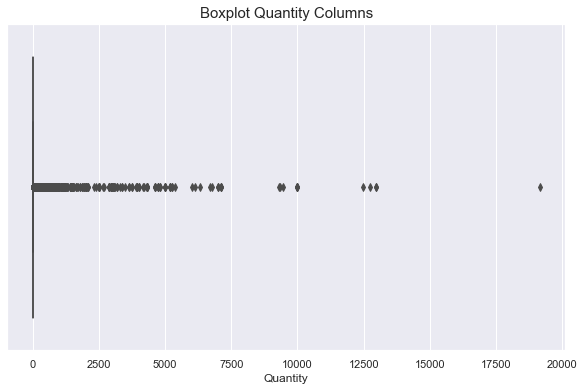

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(df1['Quantity'])
plt.title('Boxplot Quantity Columns', fontsize=15)
plt.show()

Berdasarkan gambar di atas, terlihat untuk kolom `Quantity` mempunyai data outlier.

**Boxplot in Price Columns**

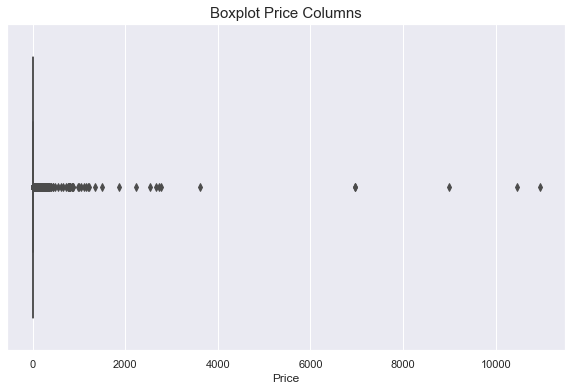

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(df1['Price'])
plt.title('Boxplot Price Columns', fontsize=15)
plt.show()

Berdasarkan gambar di atas, kolom `Price` mempunyai data outlier.

**Remove Outlier Data From Quantity Columns**

Dalam menangani data *outlier* pada kolom `Quantity`, dapat dihitung terlebih dahulu IQR(*Inter Quartile Range*) dari data. Selanjutnya dapat mencari batas atas *outlier* dan batas bawah *outlier*.

In [33]:
q1_quantity = df1['Quantity'].quantile(0.25)
q3_quantity = df1['Quantity'].quantile(0.75)
IQR = q3_quantity - q1_quantity
min_quantity = q1_quantity - 1.5*IQR
max_quantity = q3_quantity + 1.5*IQR
print(f'Q1:{q1_quantity}')
print(f'Q3:{q3_quantity}')
print(f'IQR:{IQR}')
print(f'Min Quantity:{min_quantity}')
print(f'Max Quantity:{max_quantity}')

Q1:2.0
Q3:12.0
IQR:10.0
Min Quantity:-13.0
Max Quantity:27.0


Selanjutnya lakukan *subsetting* pada data agar mengambil data yang berada di bawah batas atas *outlier* dan di atas batas bawah *outlier*.

In [34]:
df1 = df1[(df1['Quantity']<=max_quantity) & (df1['Quantity']>=min_quantity)]

In [35]:
df1.shape

(361229, 8)

Terlihat jumlah data setelah membuang data *outlier* pada kolom `Quantity` adalah sebanyak 361229.

**Remove Outlier Data From Price Columns**

Lakukan proses yang sama untuk menangani data *outlier* pada kolom `Price`.

In [36]:
q1_price = df1['Price'].quantile(0.25)
q3_price = df1['Price'].quantile(0.75)
IQR = q3_price - q1_price
min_price = q1_price - 1.5*IQR
max_price = q3_price + 1.5*IQR
print(f'Q1:{q1_price}')
print(f'Q3:{q3_price}')
print(f'IQR:{IQR}')
print(f'Min Price:{min_price}')
print(f'Max Price:{max_price}')

Q1:1.25
Q3:3.75
IQR:2.5
Min Price:-2.5
Max Price:7.5


In [37]:
df1 = df1[(df1['Price']<=max_price) & (df1['Price']>=min_price)]

In [38]:
df1.shape

(330139, 8)

Terlihat jumlah data setelah membuang data *outlier* pada kolom `Price` adalah sebanyak 330139.

## Exploratory Data Analysis (EDA)

### Per Month

Definisikan sebuah fungsi `make_line_plot()` untuk membuat *line plot* dalam proses *Exploratory Data Analysis*.

In [39]:
def make_line_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(16,5))
    plt.plot(x, y, linestyle='--', marker='o', color='maroon')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=15)
    plt.show()

**Number of Transaction Per Month**

Buat kolom baru `InvoiceMonth` yang menyatakan tahun dan bulan dari tiap transaksi pembelian.

In [40]:
df1['InvoiceMonth'] = df1['InvoiceDate'].dt.strftime('%Y-%m')

Lakukan proses agregasi untuk menghitung jumlah pada kolom `Invoice` berdasarkan bulan transaksi dilakukan. 

In [41]:
df1_grp1 = df1.groupby('InvoiceMonth')['Invoice'].count()
df1_grp1

InvoiceMonth
2009-12    26073
2010-01    18546
2010-02    20012
2010-03    27460
2010-04    22593
2010-05    23547
2010-06    25780
2010-07    22685
2010-08    22146
2010-09    29010
2010-10    41666
2010-11    50621
Name: Invoice, dtype: int64

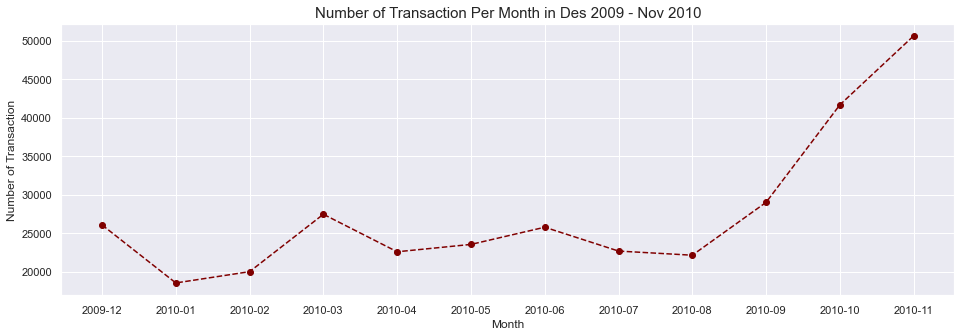

In [42]:
make_line_plot(x=df1_grp1.index, 
               y=df1_grp1, 
               title='Number of Transaction Per Month in Des 2009 - Nov 2010',
               xlabel='Month',
               ylabel='Number of Transaction')

Berdasarkan gambar di atas, terlihat bahwa jumlah transaksi mengalami peningkatan yang tinggi sejak bulan September 2010 hingga mencapai titik tertingginya di bulan November 2010.

**Total Customer Money Spend Per Month**

Buat kolom baru `Spend` yang menyatakan perkalian antara kolom `Quantity` dan `Price`.

In [43]:
df1['Spend'] = df1['Quantity']*df1['Price']

In [44]:
df1.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,Spend
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.0


Lakukan proses agregasi untuk menghitung jumlah `Spend` berdasarkan bulan transaksi dilakukan.

In [45]:
df1_grp2 = df1.groupby('InvoiceMonth')['Spend'].sum()
df1_grp2

InvoiceMonth
2009-12    365431.430
2010-01    254326.762
2010-02    264033.436
2010-03    356433.261
2010-04    309740.902
2010-05    309253.180
2010-06    319489.440
2010-07    296543.660
2010-08    296085.140
2010-09    405579.911
2010-10    541450.180
2010-11    610665.452
Name: Spend, dtype: float64

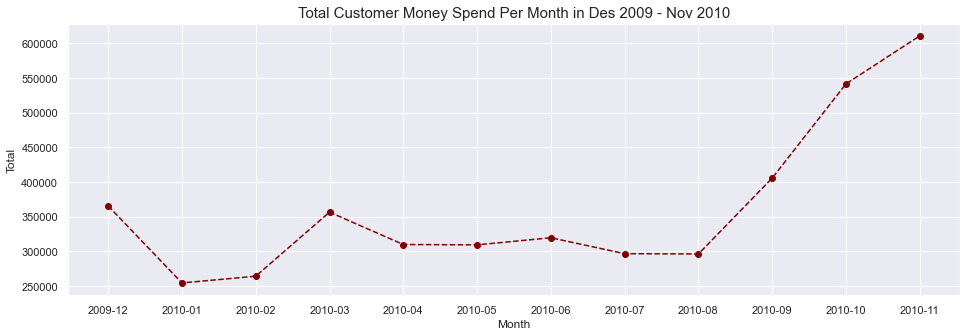

In [46]:
make_line_plot(x=df1_grp2.index, 
               y=df1_grp2, 
               title='Total Customer Money Spend Per Month in Des 2009 - Nov 2010',
               xlabel='Month',
               ylabel='Total')

Berdasarkan gambar di atas, terlihat bahwa jumlah pengeluaran uang *customer* untuk melakukan transaksi juga mengalami peningkatan yang tinggi sejak bulan September 2010 hingga mencapai titik tertingginya di bulan November 2011.

**Average Customer Money Spend Per Month**

Lakukan proses agregasi untuk melihat rataan uang yang dikeluarkan *customer* dalam melakukan transaksi berdasarkan bulan terjadinya transaksi.

In [47]:
df1_grp3 = df1.groupby('InvoiceMonth')['Spend'].mean()
df1_grp3

InvoiceMonth
2009-12    14.015703
2010-01    13.713295
2010-02    13.193756
2010-03    12.980090
2010-04    13.709596
2010-05    13.133443
2010-06    12.392919
2010-07    13.072235
2010-08    13.369689
2010-09    13.980693
2010-10    12.995012
2010-11    12.063481
Name: Spend, dtype: float64

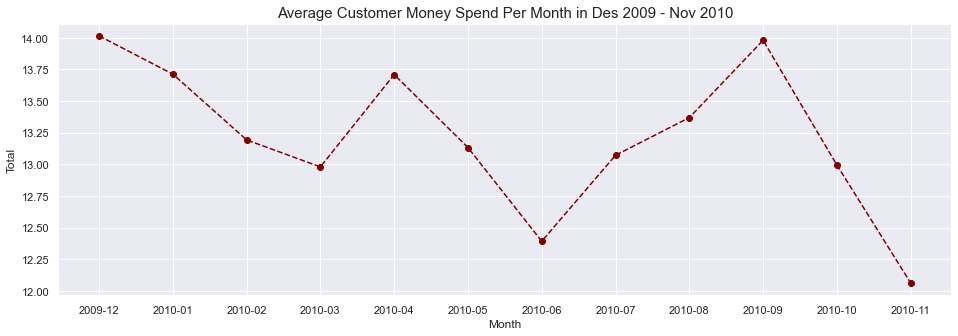

In [48]:
make_line_plot(x=df1_grp3.index, 
               y=df1_grp3, 
               title='Average Customer Money Spend Per Month in Des 2009 - Nov 2010',
               xlabel='Month',
               ylabel='Total')

Berdasarkan gambar di atas, meskipun jumlah transaksi selama satu bulan terbanyak jatuh di bulan November, ternyata rataan uang yang dikeluarkan *customer* dalam melakukan transaksi adalah yang paling rendah dibandingkan bulan lainnya.

### Function to Make Barplot

Definisikan fungsi `make_bar_plot()` untuk membuat diagram batang dalam kebutuhan proses *Exploratory Data Analysis*.

In [49]:
def make_bar_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(16,5))
    sns.barplot(x, y)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=15)
    plt.show()

### Per Day

In [50]:
day_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Buat kolom baru `InvoiceDay` yang menyatakan hari dari tiap transaksi pembelian.

In [51]:
df1['InvoiceDay'] = df1['InvoiceDate'].dt.strftime('%A')

**Number of Transaction Per Day**

Lakukan proses agregasi untuk melihat jumlah transaksi berdasarkan hari terjadinya transaksi.

In [52]:
df1_grp4 = df1.groupby('InvoiceDay')['Invoice'].count()
df1_grp4

InvoiceDay
Friday       41107
Monday       51865
Saturday       338
Sunday       60967
Thursday     65365
Tuesday      57640
Wednesday    52857
Name: Invoice, dtype: int64

In [53]:
df1_grp4 = df1_grp4.reindex(day_index)

In [54]:
df1_grp4

InvoiceDay
Monday       51865
Tuesday      57640
Wednesday    52857
Thursday     65365
Friday       41107
Saturday       338
Sunday       60967
Name: Invoice, dtype: int64

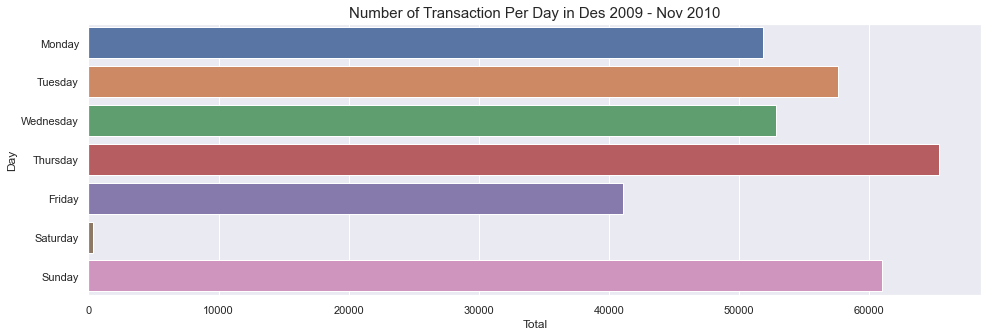

In [55]:
make_bar_plot(y=df1_grp4.index,
              x=df1_grp4,
              title='Number of Transaction Per Day in Des 2009 - Nov 2010',
              ylabel='Day',
              xlabel='Total')

Berdasarkan gambar di atas, terlihat bahwa jumlah transaksi terbanyak jatuh di hari Kamis dan diikuti di hari Minggu. Selain itu, terlihat bahwa jumlah transaksi yang terjadi pada hari Sabtu sangat sedikit jika dibandingkan dengan hari lainnya.

**Total Customer Money Spend Per Day**

Lakukan proses agregasi untuk menghitung jumlah `Spend` berdasarkan hari transaksi dilakukan.

In [56]:
df1_grp5 = df1.groupby('InvoiceDay')['Spend'].sum()

In [57]:
df1_grp5 = df1_grp5.reindex(day_index)

In [58]:
df1_grp5

InvoiceDay
Monday       689468.085
Tuesday      808938.731
Wednesday    732053.673
Thursday     883074.762
Friday       586265.172
Saturday       7560.660
Sunday       621671.671
Name: Spend, dtype: float64

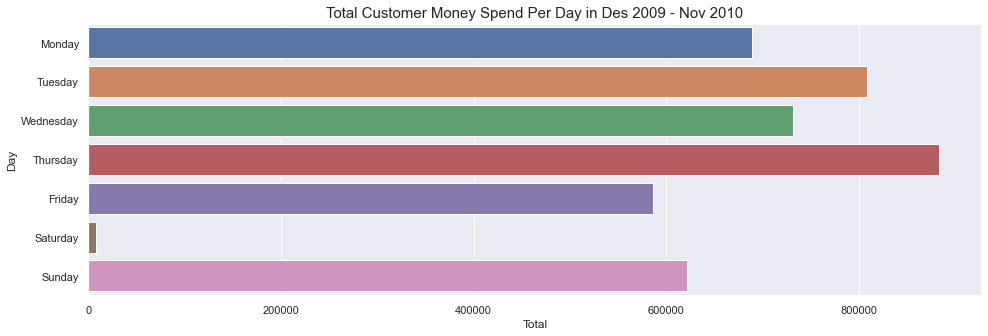

In [59]:
make_bar_plot(y=df1_grp5.index,
              x=df1_grp5,
              title='Total Customer Money Spend Per Day in Des 2009 - Nov 2010',
              ylabel='Day',
              xlabel='Total')

Berdasarkan gambar di atas, terlihat bahwa jumlah pengeluaran uang *customer* terbanyak jatuh di hari Kamis dan diikuti di hari Selasa. Selain itu, terlihat bahwa jumlah pengeluaran uang *customer* yang terjadi pada hari Sabtu sangat sedikit jika dibandingkan dengan hari lainnya.

**Average Customer Money Spend Per Day**

Lakukan proses agregasi untuk melihat rataan uang yang dikeluarkan *customer* dalam melakukan transaksi berdasarkan hari terjadinya transaksi.

In [60]:
df1_grp6 = df1.groupby('InvoiceDay')['Spend'].mean()

In [61]:
df1_grp6 = df1_grp6.reindex(day_index)

In [62]:
df1_grp6

InvoiceDay
Monday       13.293514
Tuesday      14.034329
Wednesday    13.849702
Thursday     13.509902
Friday       14.261930
Saturday     22.368817
Sunday       10.196855
Name: Spend, dtype: float64

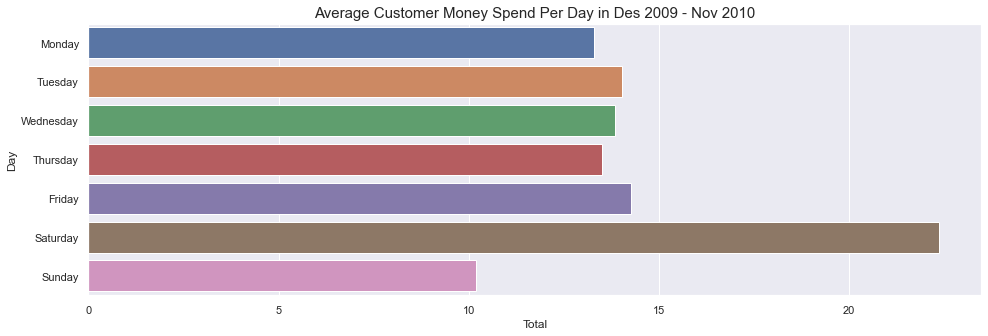

In [63]:
make_bar_plot(y=df1_grp6.index,
              x=df1_grp6,
              title='Average Customer Money Spend Per Day in Des 2009 - Nov 2010',
              ylabel='Day',
              xlabel='Total')

Berdasarkan gambar di atas, meskipun jumlah transaksi dan pengeluaran uang *customer* paling sedikit terjadi di hari Sabtu, namun rataan uang yang dikeluarkan *customer* paling tinggi jika dibandingkan dengan hari lainnya. Hari minggu merupakan hari dengan rataan uang yang dikeluarkan *customer* paling sedikit.

## Per Hour

Buat kolom baru `InvoiceHour` yang menyatakan jam dari setiap transaksi.

In [64]:
df1['InvoiceHour'] = df1['InvoiceDate'].dt.strftime('%H')

**Number of Transaction Per Hour**

Lakukan agregasi untuk melihat jumlah transaksi yang terjadi berdasarkan jam dilakukan transaksi.

In [65]:
df1_grp7 = df1.groupby('InvoiceHour')['Invoice'].count()
df1_grp7

InvoiceHour
07      442
08     5047
09    15379
10    27734
11    41465
12    58845
13    55366
14    46420
15    35591
16    23505
17    11551
18     3673
19     4144
20      977
Name: Invoice, dtype: int64

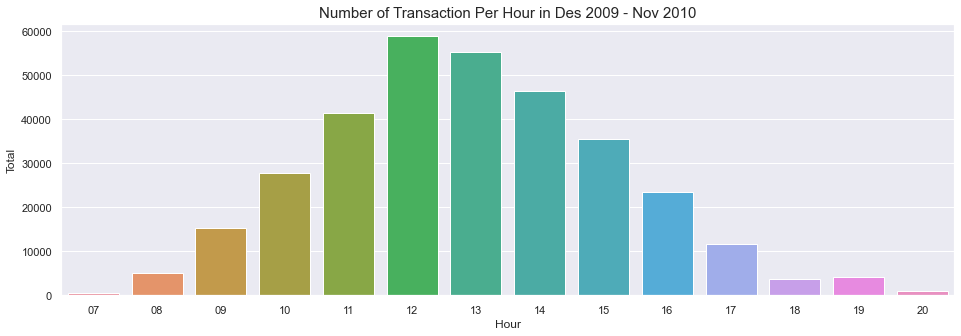

In [66]:
make_bar_plot(x=df1_grp7.index,
              y=df1_grp7,
              title='Number of Transaction Per Hour in Des 2009 - Nov 2010',
              xlabel='Hour',
              ylabel='Total')

Berdasarkan gambar di atas, diperoleh bahwa jam 12, 13, dan 14 adalah tiga jam dengan jumlah terjadi transaksi terbanyak.

**Total Customer Money Spend Per Hour**

Lakukan agregasi untuk melihat jumlah uang yang dikeluarkan *customer* berdasarkan jam dilakukan transaksi.

In [67]:
df1_grp8 = df1.groupby('InvoiceHour')['Spend'].sum()
df1_grp8

InvoiceHour
07     11422.570
08    107900.230
09    291732.610
10    481531.452
11    524846.033
12    705529.081
13    659721.064
14    580946.500
15    453513.242
16    274137.321
17    136739.871
18     54385.170
19     40457.510
20      6170.100
Name: Spend, dtype: float64

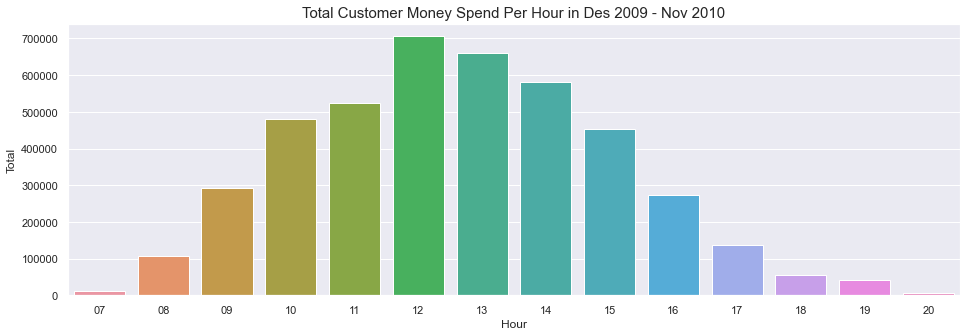

In [68]:
make_bar_plot(x=df1_grp8.index,
              y=df1_grp8,
              title='Total Customer Money Spend Per Hour in Des 2009 - Nov 2010',
              xlabel='Hour',
              ylabel='Total')

Berdasarkan gambar di atas, diperoleh bahwa jam 12, 13, dan 14 adalah tiga jam dengan jumlah uang terbanyak yang dikeluarkan *customer* dalam transaksi.

**Average Customer Money Spend Per Hour**

Dilakukan proses agregasi untuk menghitung rataan `Spend` yang dikeluarkan *customer* berdasarkan jam terjadinya transaksi.

In [69]:
df1_grp9 = df1.groupby('InvoiceHour')['Spend'].mean()
df1_grp9

InvoiceHour
07    25.842919
08    21.379083
09    18.969544
10    17.362496
11    12.657567
12    11.989618
13    11.915635
14    12.515004
15    12.742357
16    11.662936
17    11.837925
18    14.806744
19     9.762913
20     6.315353
Name: Spend, dtype: float64

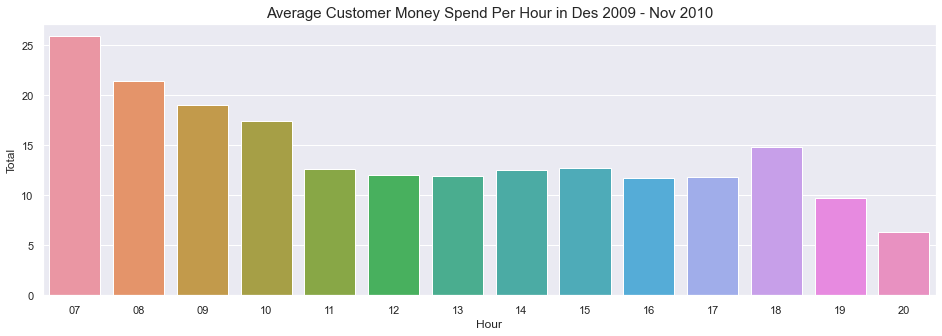

In [70]:
make_bar_plot(x=df1_grp9.index,
              y=df1_grp9,
              title='Average Customer Money Spend Per Hour in Des 2009 - Nov 2010',
              xlabel='Hour',
              ylabel='Total')

Berdasarkan gambar di atas, jam dengan rataan uang *customer* yang dikeluarkan terbanyak adalah jam 7,8, dan 9. Meskipun merupakan jam dengan jumlah transaksi dan pengeluaran uang *customer* tertinggi, rataan uang yang dikeluarkan *customer* untuk transaksi yang terjadi pada jam 12, 13, dan 14 tidak terlalu tinggi.

### Per Product

In [71]:
df1_grp10 = df1['Description'].value_counts().head(10)
df1_grp10

WHITE HANGING HEART T-LIGHT HOLDER    2369
STRAWBERRY CERAMIC TRINKET BOX        1181
HOME BUILDING BLOCK WORD              1154
REX CASH+CARRY JUMBO SHOPPER          1052
ASSORTED COLOUR BIRD ORNAMENT         1028
60 TEATIME FAIRY CAKE CASES            987
PACK OF 72 RETRO SPOT CAKE CASES       969
LUNCH BAG RED SPOTTY                   959
WOODEN FRAME ANTIQUE WHITE             946
LOVE BUILDING BLOCK WORD               941
Name: Description, dtype: int64

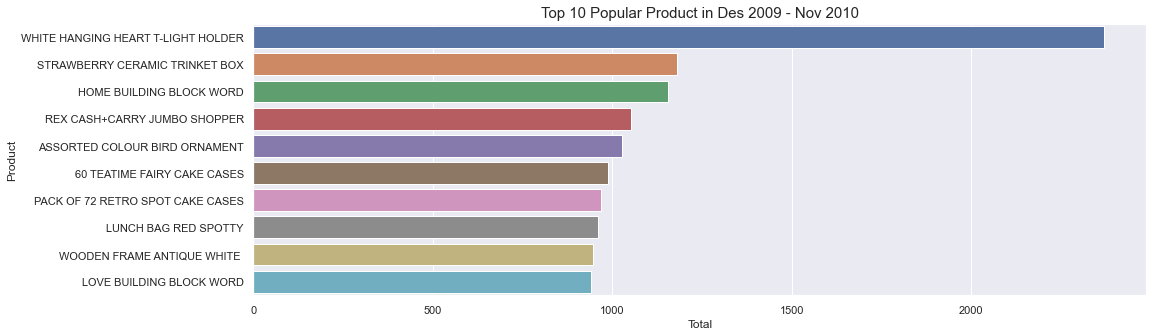

In [72]:
make_bar_plot(y=df1_grp10.index,
              x=df1_grp10,
              title='Top 10 Popular Product in Des 2009 - Nov 2010',
              xlabel='Total',
              ylabel='Product')

Terlihat berdasarkan gambar di atas, produk yang paling sering dibeli oleh *customer* selama periode bulan Desember 2009 hingga bulan November 2010 adalah *WHITE HANGING HEART T-LIGHT HOLDER* dengan jumlah pembelian 2 kali lipat lebih tinggi dibandingkan produk *STRAWBERRY CERAMIC TRINKET BOX* yang menempati posisi kedua.

### Per Country

In [73]:
df1_grp11 = df1['Country'].value_counts().head(10)
df1_grp11

United Kingdom     302776
EIRE                 6342
Germany              6122
France               4236
Netherlands          1288
Spain                 969
Switzerland           875
Belgium               844
Portugal              726
Channel Islands       594
Name: Country, dtype: int64

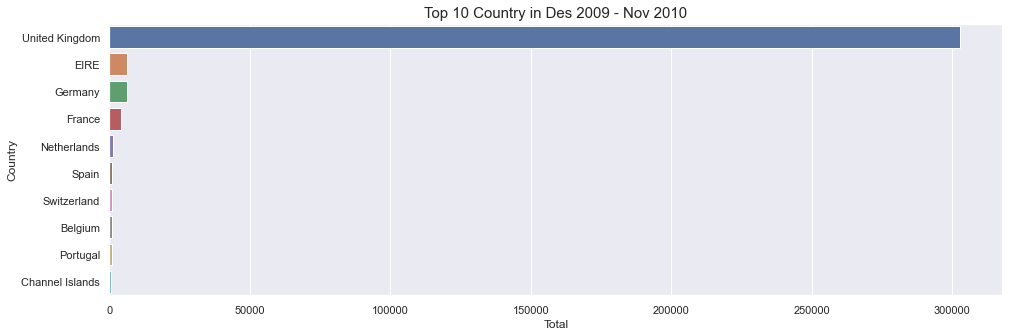

In [74]:
make_bar_plot(y=df1_grp11.index,
              x=df1_grp11,
              title='Top 10 Country in Des 2009 - Nov 2010',
              xlabel='Total',
              ylabel='Country')

Terlihat bahwa transaksi yang dilakukan sangat didominasi oleh *customer* yang berasal dari negara Inggris.

## RFM Analysis

Metode yang digunakan untuk melakukan segmentasi pada *customer* adalah RFM (*Recency, Frequency, Monetary*) Analisis yang mengakegorikan *customer* berdasarkan tiga buah *metric* tersebut. *Recency* menyatakan seberapa lama *customer* tidak melakukan proses pembelian barang sejak pembelian barang sebelumnya. *Frequency* menyatakan seberapa sering seorang *customer* melakukan pembelian barang atau melakukan transaksi. *Monetary* menyatakan seberapa banyak jumlah pengeluaran yang dilakukan *customer* dalam melakukan transaksi.

Definisikan fungsi `make_displot()` untuk melihat distribusi pada data.

In [75]:
def make_displot(data, xlabel):
    plt.figure(figsize=(15,6))
    sns.distplot(data, kde=True, bins=50)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title(f'Distribution on {xlabel}', fontsize=15)
    plt.show()

Bangun sebuah *dataframe* baru yang menyimpan ID dari tiap *customer* secara unik.

In [76]:
df1_customer_unique = pd.DataFrame(df1['Customer ID'].unique()).rename(columns={0:'Customer ID'}).astype(int)
df1_customer_unique.head()

,Customer ID
0,13085
1,13078
2,15362
3,12682
4,18087


### Recency

Catat transaksi terbaru yang dilakukan oleh setiap *customer*.

In [77]:
df1_recent_trans = df1.groupby('Customer ID')['InvoiceDate'].max().reset_index().rename(columns={'InvoiceDate':'Latest Date'})
df1_recent_trans['Customer ID'] = df1_recent_trans['Customer ID'].astype(int)
df1_recent_trans.head()

,Customer ID,Latest Date
0,12346,2010-06-28 13:53:00
1,12347,2010-10-31 14:20:00
2,12348,2010-09-27 14:59:00
3,12349,2010-10-28 08:23:00
4,12351,2010-11-29 15:23:00


Hitung `Recency` yang menyatakan selisih hari antara hari terakhir dimana *customer* melakukan transaksi dengan hari terkini.

In [78]:
df1_recent_trans['Recency'] = (df1_recent_trans['Latest Date'].max() - df1_recent_trans['Latest Date']).dt.days
df1_recent_trans.head()

,Customer ID,Latest Date,Recency
0,12346,2010-06-28 13:53:00,155
1,12347,2010-10-31 14:20:00,30
2,12348,2010-09-27 14:59:00,64
3,12349,2010-10-28 08:23:00,33
4,12351,2010-11-29 15:23:00,1


Lakukan proses *merge* berdasarkan ID unik dari *customer*.

In [79]:
df1_recency = pd.merge(left=df1_customer_unique, 
                       right=df1_recent_trans[['Customer ID', 'Recency']],
                       on='Customer ID')
df1_recency.head()

,Customer ID,Recency
0,13085,305
1,13078,0
2,15362,74
3,12682,11
4,18087,5


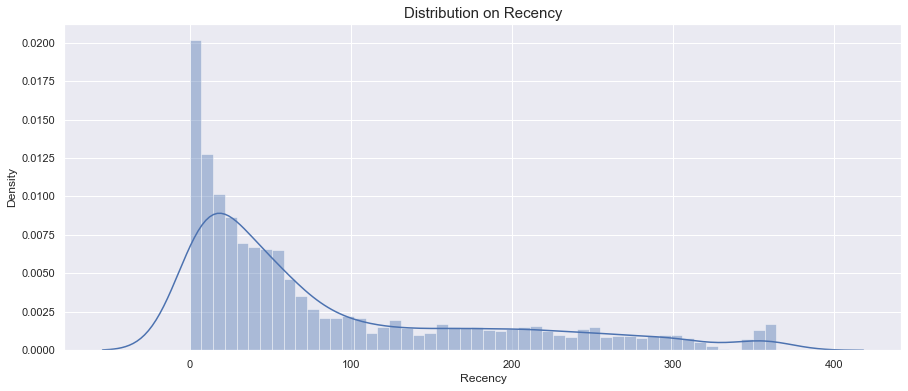

In [80]:
make_displot(df1_recency['Recency'], 'Recency')

Berdasarkan gambar di atas, terlihat grafik distribusi pada `Recency` adalah skew positif.

### Frequency

Catat jumlah transaksi yang telah dilakukan oleh masing-masing *customer*.

In [81]:
df1_freq = df1.groupby('Customer ID')['InvoiceDate'].count().reset_index().rename(columns={'InvoiceDate':'Frequency'})
df1_freq.head()

,Customer ID,Frequency
0,12346.0,33
1,12347.0,39
2,12348.0,20
3,12349.0,80
4,12351.0,20


In [82]:
df1_rf = pd.merge(left=df1_recency,
                  right=df1_freq,
                  on='Customer ID')
df1_rf.head()

,Customer ID,Recency,Frequency
0,13085,305,61
1,13078,0,347
2,15362,74,31
3,12682,11,400
4,18087,5,50


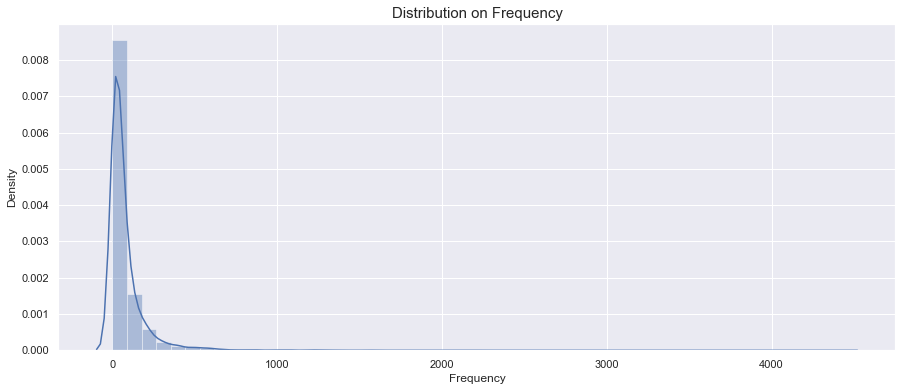

In [83]:
make_displot(df1_rf['Frequency'], 'Frequency')

Berdasarkan gambar, terlihat distribusi pada `Frequency` juga skew positif.

### Monetary

Hitung jumlah uang yang dikeluarkan *customer* selama melakukan transaksi.

In [84]:
df1_monetary = df1.groupby('Customer ID')['Spend'].sum().reset_index().rename(columns={'Spend':'Monetary'})
df1_monetary.head()

,Customer ID,Monetary
0,12346.0,372.86
1,12347.0,573.28
2,12348.0,222.16
3,12349.0,1635.89
4,12351.0,288.18


In [85]:
df1_rfm = pd.merge(left=df1_rf,
                   right=df1_monetary,
                   on='Customer ID')
df1_rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,13085,305,61,1916.40
1,13078,0,347,11466.64
2,15362,74,31,444.81
3,12682,11,400,7977.27
4,18087,5,50,1675.26


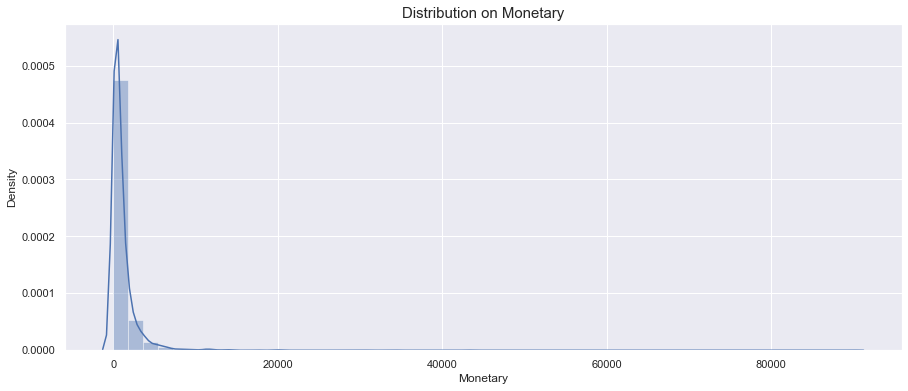

In [86]:
make_displot(df1_rfm['Monetary'], 'Monetary')

Berdasarkan gambar, terlihat distribusi pada `Monetary` juga skew positif.

## Building Model RFM

### Calculate Weight RFM

In [87]:
df1_rfm = df1_rfm.sort_values(by='Customer ID').reset_index(drop=True)

In [88]:
df1_rfm[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,4096.000000,4096.000000,4096.000000
mean,87.174805,80.600342,1056.892762
std,95.081551,169.459371,2314.858825
min,0.000000,1.000000,0.950000
25%,15.000000,16.000000,219.952500
50%,47.000000,38.000000,489.550000
75%,135.000000,87.000000,1183.540000
max,364.000000,4425.000000,89915.720000


In [89]:
df1_rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,155,33,372.86
1,12347,30,39,573.28
2,12348,64,20,222.16
3,12349,33,80,1635.89
4,12351,1,20,288.18


**Function to Find Optimum Cluster**

Definisikan fungsi `find_cluster()` untuk menghitung jumlah *cluster* terbaik dengan metode *elbow* berdasarkan algoritma K-Means.

In [90]:
def find_cluster(data, max_k):
    sse = {}
    df = data
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit(df)
        df['Cluster'] = kmeans.labels_
        sse[k] = kmeans.inertia_
    
    plt.figure(figsize=(16,5))
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xticks(np.arange(1,max_k))
    plt.ticklabel_format(style='plain')
    plt.xlabel('Number of cluster', fontsize=12)
    plt.ylabel('Inertia', fontsize=12)
    plt.title('Optimum Number of Cluster', fontsize=15)
    plt.show()

**Function to Make Scatterplot**

Definikan fungsi `make_scatter()` untuk membuat scatter plot.

In [91]:
def make_scatter(data_x, data_y, xlabel):
    plt.figure(figsize=(16,5))
    sns.scatterplot(data_x, data_y)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(f'{xlabel} Cluster', fontsize=12)
    plt.title(f'Scatter Plot {xlabel} and {xlabel} Cluster', fontsize=15)
    plt.show()

**Recency**

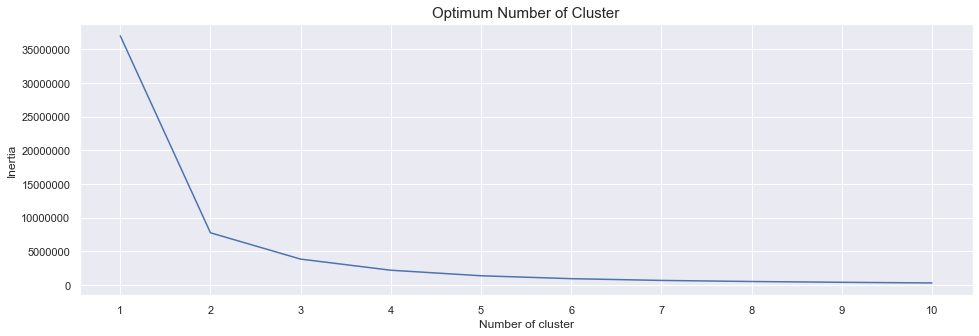

In [92]:
find_cluster(df1_rfm[['Recency']], 11)

Berdasarkan gambar di atas, terlihat bahwa jumlah *cluster* atau `k` ideal adalah 3. Hal ini dikarenakan nilai inersia untuk jumlah *cluster* atau `k` yang lebih besar dari 3 sudah tidak terlalu turun secara drastis. Selanjutnya, dapat digunakan algoritma K-Means Clustering dengan jumlah *cluster* atau `k` = 3 dalam melakukan proses segmentasi.

In [93]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df1_rfm[['Recency']])
df1_rfm['Recency Cluster'] = kmeans.predict(df1_rfm[['Recency']])

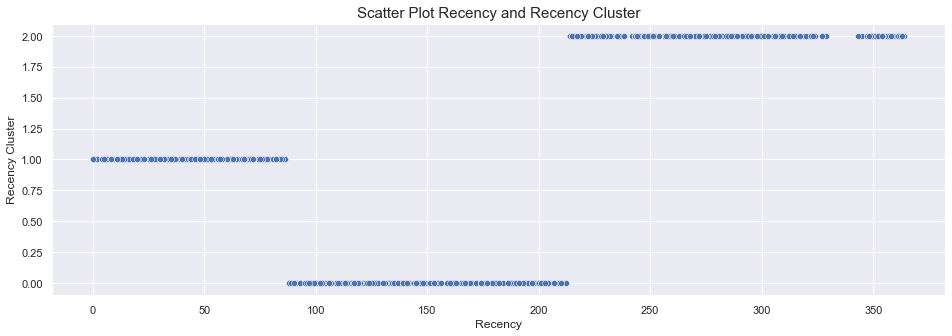

In [94]:
make_scatter(df1_rfm['Recency'], df1_rfm['Recency Cluster'], 'Recency')

Sebelumnya kita telah melakukan proses *clustering* dan jika dilihat pada gambar di atas, telah terbentuk 3 buah *cluster*. Namun urutan dari *cluster* masih belum sesuai. Hal ini dikarenakan kita menyatakan bahwa *customer* dengan nilai *Recency* yang rendah akan masuk kepada *cluster* terbaik. Oleh kerena itu, akan dilakukan proses dalam mengganti urutan pada *cluster*.

In [95]:
cluster_swap = {0:1, 1:2, 2:0}
df1_rfm['Recency Cluster'] = df1_rfm['Recency Cluster'].replace(cluster_swap)

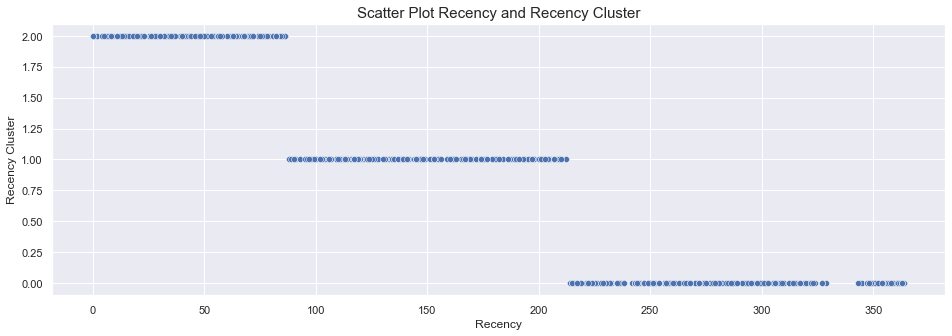

In [96]:
make_scatter(df1_rfm['Recency'], df1_rfm['Recency Cluster'], 'Recency')

Proses perubahan urutan pada *cluster* telah dilakukan.

In [97]:
df1_rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency Cluster
0,12346,155,33,372.86,1
1,12347,30,39,573.28,2
2,12348,64,20,222.16,2
3,12349,33,80,1635.89,2
4,12351,1,20,288.18,2


**Frequency**

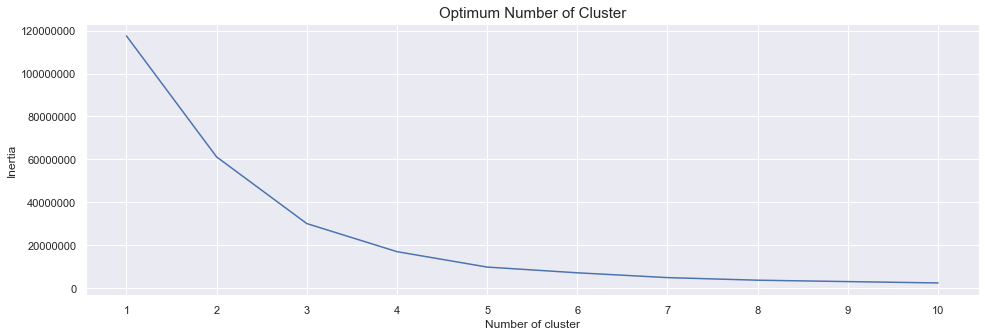

In [98]:
find_cluster(df1_rfm[['Frequency']], 11)

Berdasarkan gambar di atas, kita pilih jumlah *cluster* atau `k` = 3 dalam melakukan proses *clustering*.

In [99]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df1_rfm[['Frequency']])
df1_rfm['Frequency Cluster'] = kmeans.predict(df1_rfm[['Frequency']])

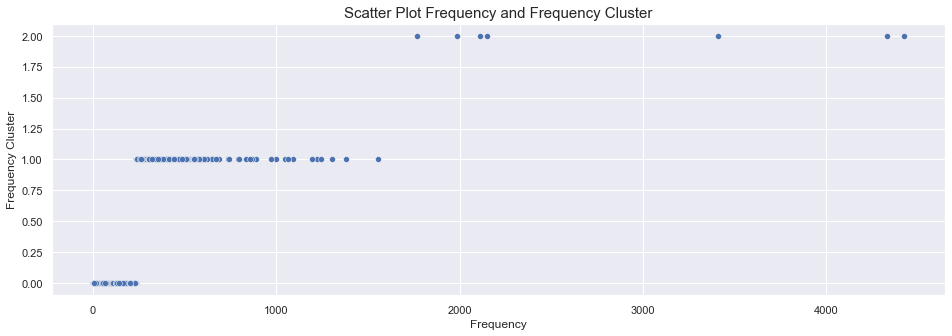

In [100]:
make_scatter(df1_rfm['Frequency'], df1_rfm['Frequency Cluster'], 'Frequency')

Jika melihat berdasarkan *metric* *Frequency*, seorang *customer* yang lebih sering melakukan transaksi akan masuk pada *cluster* terbaik sehingga proses *clustering* jika dilihat berdasarkan gambar di atas sudah sesuai.

In [101]:
df1_rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency Cluster,Frequency Cluster
0,12346,155,33,372.86,1,0
1,12347,30,39,573.28,2,0
2,12348,64,20,222.16,2,0
3,12349,33,80,1635.89,2,0
4,12351,1,20,288.18,2,0


**Monetary**

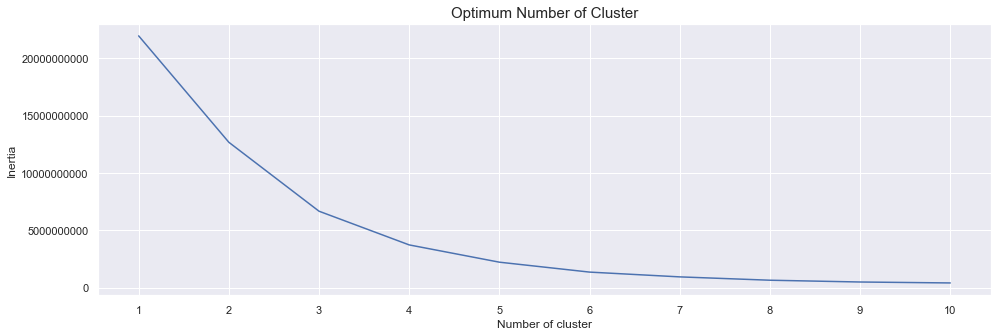

In [102]:
find_cluster(df1_rfm[['Monetary']], 11)

Berdasarkan gambar di atas, kita pilih jumlah *cluster* atau `k` = 3 dalam melakukan proses *clustering*.

In [103]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df1_rfm[['Monetary']])
df1_rfm['Monetary Cluster'] = kmeans.predict(df1_rfm[['Monetary']])

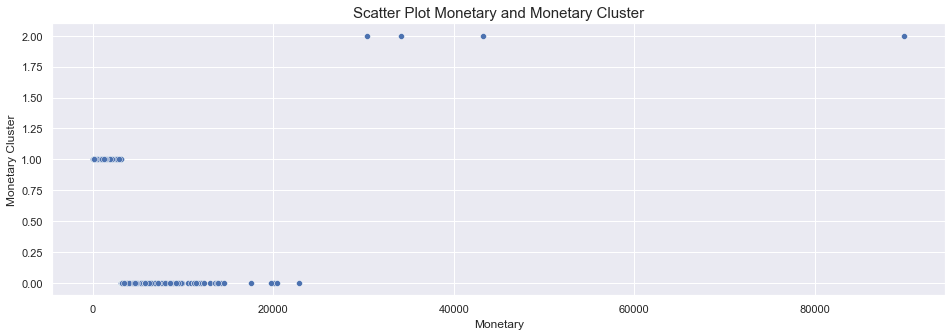

In [104]:
make_scatter(df1_rfm['Monetary'], df1_rfm['Monetary Cluster'], 'Monetary')

Sebelumnya kita telah melakukan proses *clustering* dan jika dilihat pada gambar di atas, terlihat bahwa urutan *cluster* masih belum sesuai. Oleh karena itu, akan kita ubah urutan pada *cluster*.

In [105]:
cluster_swap = {0:1, 1:0}
df1_rfm['Monetary Cluster'] = df1_rfm['Monetary Cluster'].replace(cluster_swap)

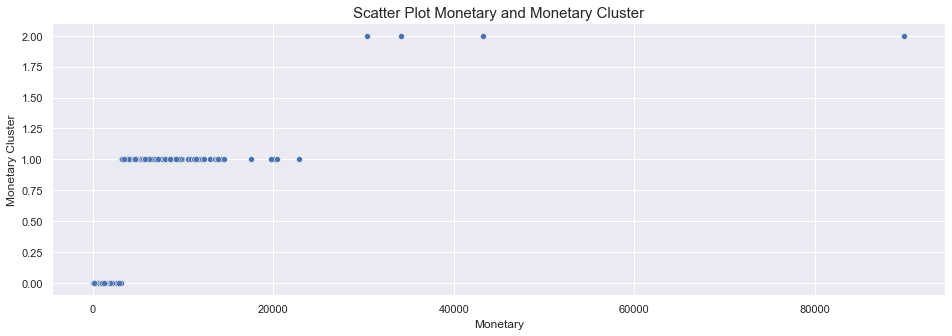

In [106]:
make_scatter(df1_rfm['Monetary'], df1_rfm['Monetary Cluster'], 'Monetary')

In [107]:
df1_rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency Cluster,Frequency Cluster,Monetary Cluster
0,12346,155,33,372.86,1,0,0
1,12347,30,39,573.28,2,0,0
2,12348,64,20,222.16,2,0,0
3,12349,33,80,1635.89,2,0,0
4,12351,1,20,288.18,2,0,0


### Scoring

Jumlahkan nilai *cluster* dari tiap *metric* dan bentuk kolom `Score`.

In [108]:
df1_rfm['Score'] = df1_rfm['Recency Cluster'] + df1_rfm['Frequency Cluster'] + df1_rfm['Monetary Cluster']

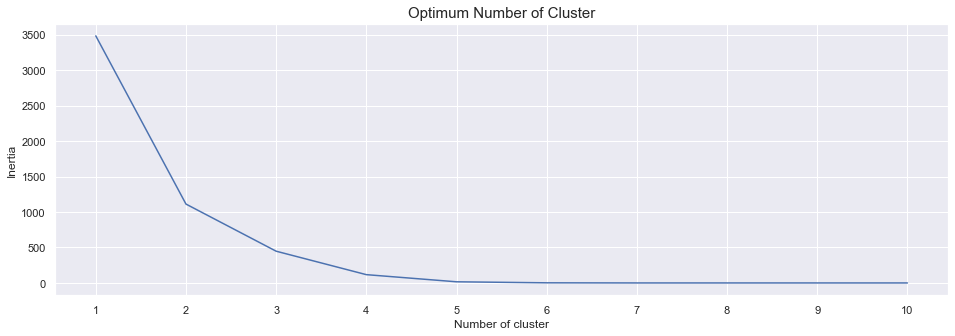

In [109]:
find_cluster(df1_rfm[['Score']], 11)

Pilih jumlah *cluster* atau `k`= 3 dalam melakukan proses *clustering* pada kolom `Score`.

In [110]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df1_rfm[['Score']])
df1_rfm['Score Cluster'] = kmeans.predict(df1_rfm[['Score']])

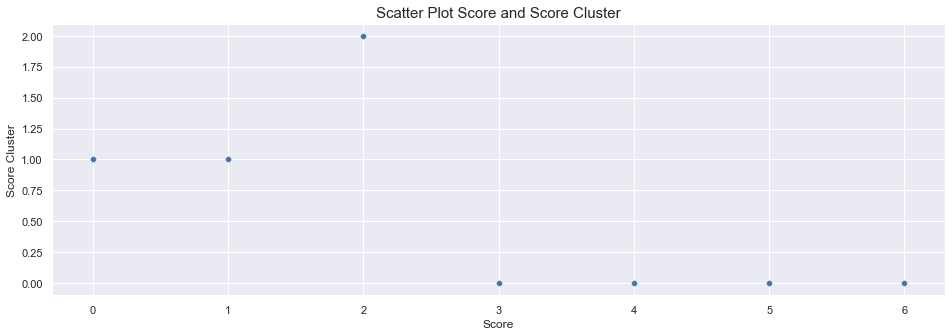

In [111]:
make_scatter(df1_rfm['Score'], df1_rfm['Score Cluster'], 'Score')

Lakukan proses perubahan urutan pada *cluster*.

In [112]:
cluster_swap = {0:2, 1:0, 2:1}
df1_rfm['Score Cluster'] = df1_rfm['Score Cluster'].replace(cluster_swap)

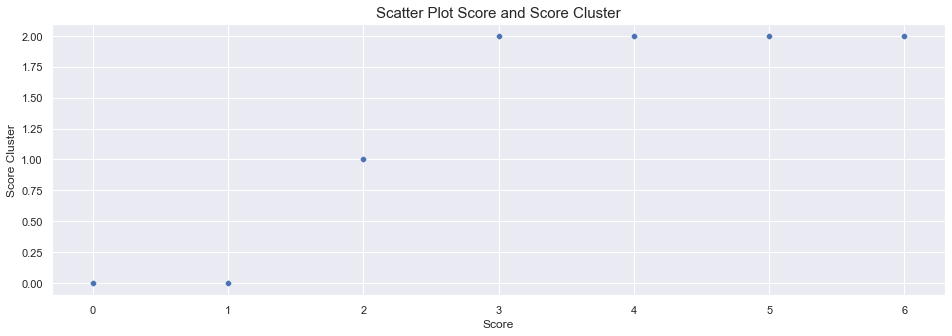

In [113]:
make_scatter(df1_rfm['Score'], df1_rfm['Score Cluster'], 'Score')

In [114]:
df1_rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency Cluster,Frequency Cluster,Monetary Cluster,Score,Score Cluster
0,12346,155,33,372.86,1,0,0,1,0
1,12347,30,39,573.28,2,0,0,2,1
2,12348,64,20,222.16,2,0,0,2,1
3,12349,33,80,1635.89,2,0,0,2,1
4,12351,1,20,288.18,2,0,0,2,1


Nyatakan *cluster*=0 sebagai *Low Value Customer*, 1 sebagai *Medium Value Customer*, 2 sebagai *High Value Customer*.

In [115]:
cluster_swap = {0:'Low Value Customer', 1:'Medium Value Customer', 2:'High Value Customer'}
df1_rfm['Score Cluster'] = df1_rfm['Score Cluster'].replace(cluster_swap)
df1_rfm = df1_rfm.rename(columns={'Score Cluster':'Label'})

In [116]:
df1_rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency Cluster,Frequency Cluster,Monetary Cluster,Score,Label
0,12346,155,33,372.86,1,0,0,1,Low Value Customer
1,12347,30,39,573.28,2,0,0,2,Medium Value Customer
2,12348,64,20,222.16,2,0,0,2,Medium Value Customer
3,12349,33,80,1635.89,2,0,0,2,Medium Value Customer
4,12351,1,20,288.18,2,0,0,2,Medium Value Customer


### Analysis Based on Label

**Number of Customer After Segmentation**

Lakukan proses agregasi untuk melihat jumlah *customer* pada setiap *cluster*.

In [117]:
df1_label = df1_rfm['Label'].value_counts().reindex(['Low Value Customer', 'Medium Value Customer', 'High Value Customer'])
df1_label = df1_label.reset_index().rename(columns={'index':'Label', 'Label':'Count'})
df1_label

,Label,Count
0,Low Value Customer,1350
1,Medium Value Customer,2388
2,High Value Customer,358


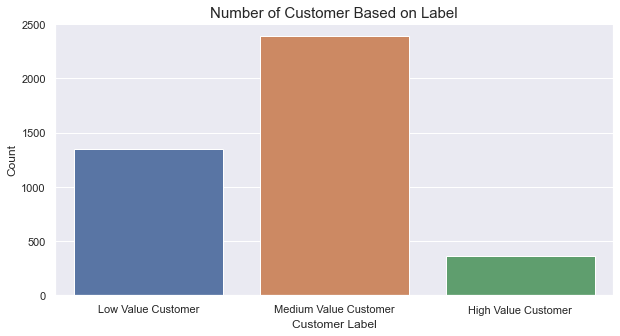

In [118]:
plt.figure(figsize=(10,5))
sns.countplot(df1_rfm['Label'])
plt.xlabel('Customer Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Customer Based on Label', fontsize=15)
plt.show()

In [119]:
print('Low Value Customer : {:.3f}%'.format((df1_label['Count'][0]/df1_label['Count'].sum())*100))
print('Medium Value Customer : {:.3f}%'.format((df1_label['Count'][1]/df1_label['Count'].sum())*100))
print('High Value Customer : {:.3f}%'.format((df1_label['Count'][2]/df1_label['Count'].sum())*100))

Low Value Customer : 32.959%
Medium Value Customer : 58.301%
High Value Customer : 8.740%


Berdasarkan gambar di atas, terlihat bahwa *customer* dengan tipe terbanyak adalah *Medium Value Customer* sebanyak 58,301% diikuti dengan *Low Value Customer* sebanyak 32,959% dan terakhir *High Value Customer* sebanyak 8,74%.

**Function to Make 3d Scatter Plot**

In [120]:
def make_3d_scatter(data, label):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    xs = data[data['Label']==label]['Recency']
    ys = data[data['Label']==label]['Frequency']
    zs = data[data['Label']==label]['Monetary']
    
    ax.scatter(xs,ys,zs)
    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')
    ax.set_title(f"RFM Based on {label}")
    plt.show()

**Group By Label**

In [121]:
df1_rfm.groupby('Label')[['Recency', 'Frequency', 'Monetary']].agg(['sum', 'min', 'max', 'mean']).reindex(['Low Value Customer', 'Medium Value Customer', 'High Value Customer'])

Recency                      Frequency            \
                          sum min  max        mean       sum min   max   
Label                                                                    
Low Value Customer     274081  88  364  203.022963     41826   1   245   
Medium Value Customer   76812   0  209   32.165829    145508   1   344   
High Value Customer      6175   0  155   17.248603    142805  70  4425   

                                      Monetary                                 
                             mean          sum     min       max         mean  
Label                                                                          
Low Value Customer      30.982222   553099.874    0.95   3125.08   409.703610  
Medium Value Customer   60.932998  1930866.604    1.25   4059.95   808.570605  
High Value Customer    398.896648  1845066.276  786.02  89915.72  5153.816413

Jika melihat berdasarkan tabel di atas, *customer* bertipe *Low Value Customer* rata-rata menghabiskan 203 hari untuk melakukan transaksi selanjutnya, dengan rataan jumlah transaksi sebanyak 30 kali dan rataan total pengeluaran uang sebanyak 409,7. Sementara untuk *customer* bertipe *Medium Value Customer* rata-rata membutuhkan 32 hari untuk melakukan transaksi selanjutnya, dengan rataan jumlah transaksi sebanyak 60 kali dan rataan total pengeluaran uang sebanyak 808,57. Untuk *customer* dengan tipe *High Value Customer* rata-rata menghabiskan 17 hari untuk melakukan traksaksi selanjutnya, dengan rataan jumlah transaksi sebanyak 398 kali dan rataan total pengeluaran uang sebanyak 5153,81.

### Customer Behaviour

**Create New Data Frame**

In [122]:
df1_rfm_new = df1_rfm[['Customer ID', 'Label', 'Recency', 'Frequency', 'Monetary']].copy()
df1_rfm_new.head()

,Customer ID,Label,Recency,Frequency,Monetary
0,12346,Low Value Customer,155,33,372.86
1,12347,Medium Value Customer,30,39,573.28
2,12348,Medium Value Customer,64,20,222.16
3,12349,Medium Value Customer,33,80,1635.89
4,12351,Medium Value Customer,1,20,288.18


**Scalling**

Lakukan proses *scalling* untuk mentransformasikan data agar tidak terjadi skew pada data menggunakan fungsi logaritmik. Selanjutnya lakukan proses standarisasi pada data menggunakan `StandardScaler()`.

In [123]:
scaler = StandardScaler()
df1_rfm_scaled = df1_rfm_new.copy()
df1_rfm_scaled[['Recency', 'Frequency', 'Monetary']] = np.log(df1_rfm_scaled[['Recency', 'Frequency', 'Monetary']]+1)
df1_rfm_scaled[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(df1_rfm_scaled[['Recency', 'Frequency', 'Monetary']])

**Check Distribution**

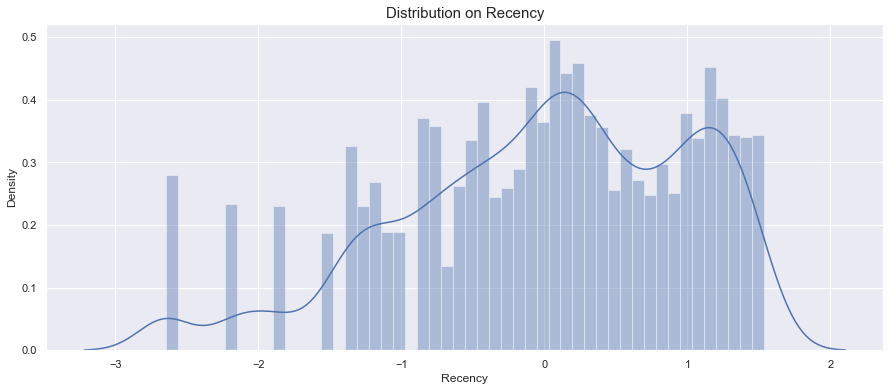

In [124]:
make_displot(df1_rfm_scaled['Recency'], 'Recency')

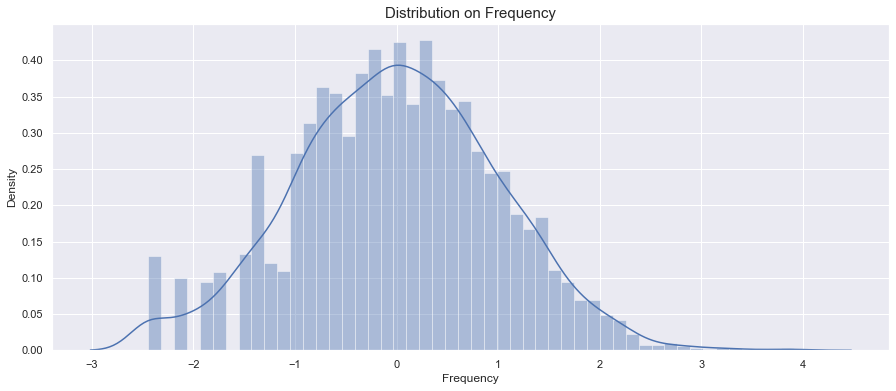

In [125]:
make_displot(df1_rfm_scaled['Frequency'], 'Frequency')

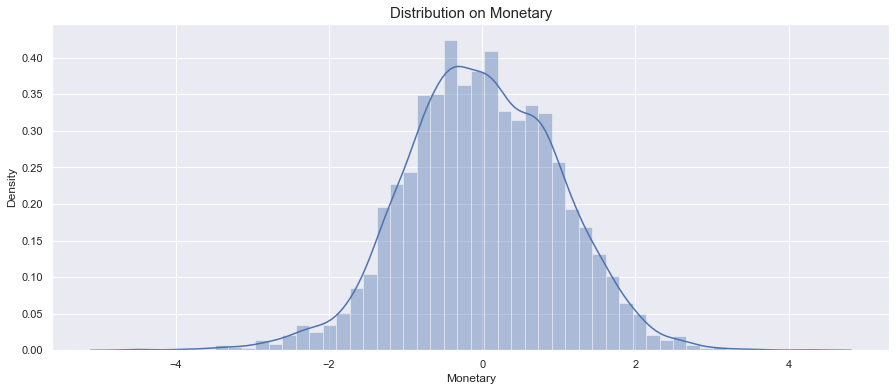

In [126]:
make_displot(df1_rfm_scaled['Monetary'], 'Monetary')

Berdasarkan tiga gambar di atas, terlihat bahwa distribusi pada kolom `Recency`, `Frequency`, dan `Monetary` sudah berbentuk distribusi normal.

**Melt**

In [127]:
df1_rfm_melt = df1_rfm_scaled.melt(id_vars=['Customer ID', 'Label'], var_name='Metric', value_name='Value')
df1_rfm_melt.head()

,Customer ID,Label,Metric,Value
0,12346,Low Value Customer,Recency,0.931735
1,12347,Medium Value Customer,Recency,-0.213820
2,12348,Medium Value Customer,Recency,0.311080
3,12349,Medium Value Customer,Recency,-0.148333
4,12351,Medium Value Customer,Recency,-2.156914


**Plot Customer Behaviour**

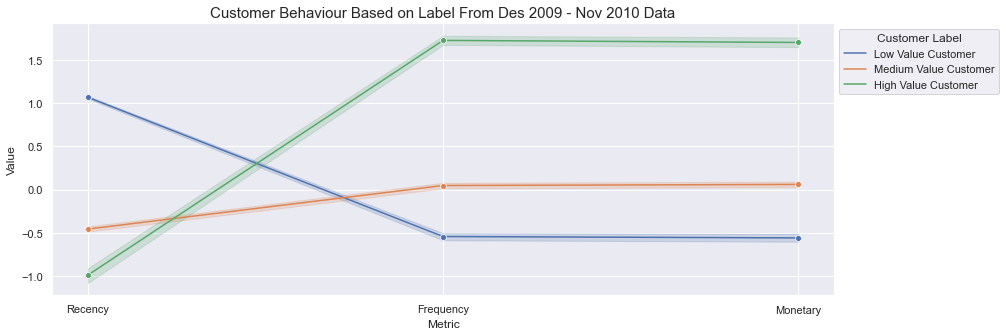

In [128]:
plt.figure(figsize=(14,5))
sns.lineplot(x='Metric', y='Value', hue='Label', data=df1_rfm_melt, marker='o')
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Customer Behaviour Based on Label From Des 2009 - Nov 2010 Data', fontsize=15)
plt.legend(bbox_to_anchor=(1,1), loc='best', title='Customer Label')
plt.show()

Berdasarkan gambar di atas, diperoleh beberapa *insight* antara lain :

1. *Customer* dengan kriteria `Low Value Customer` menghabiskan uang (*Monetary*) relatif lebih sedikit dibandingkan dengan *customer* dengan kriteria lainnya. *Customer* dengan kriteria ini juga tidak terlalu sering berbelanja (*Frequency*) jika dibandingkan dengan *customer* kriteria lainnya. Namun *customer* dengan kriteria ini memiliki (*Recency*) yang tinggi. 
2. *Customer* dengan kriteria `Medium Value Customer` menghabiskan uang (*Monetary*) dan melakukan banyak pembelian (*Frequency*) yang relatif lebih tinggi dibandingkan dengan `Low Value Customer` dan memiliki nilai *Recency* yang lebih baik dan lebih rutin melakukan pembelian barang dibandingkan dengan `Low Value Customer`.
3. *Customer* dengan kriteria `High Value Customer` menghabiskan uang (*Monetary*) dan melakukan banyak pembelian (*Frequency*) yang sangat tinggi jika dibandingkan kriteria lainnya. Selain itu, *customer* dengan tipe ini juga melakukan transaksi secara rutin jika dilihat berdasarkan nilai (*Recency*). 

## Customer Segmentation on Data Des 2010 - Nov 2011

In [129]:
df2 = data_2010_2011.copy()

### Check Characteristic Data

**Data Shape**

Kita akan mengecek ukuran dari data tahun 2010-2011 menggunakan atribut `.shape`

In [130]:
df2.shape

(541910, 8)

Terlihat data transaksi pada tahun 2010-2011 sejumlah 541910 baris dengan 8 buah kolom.

**Data Columns**

In [131]:
df2.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

**Data Info**

In [132]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Terdapat data yang kosong pada kolom tertentu saat dicek menggunakan metode .info(). Untuk data yang kita punya, diperoleh 2 kolom dengan tipe data float, 1 kolom dengan tipe data integer, dan 5 kolom dengan tipe data object.

**Descriptive Statistic**

In [133]:
df2.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Saat kita melihat statistika deskriptif dari data tahun 2009-2010, diperoleh beberapa insight seperti :

1. Nilai maksimum untuk kolom `Quantity` adalah 80995, sementara nilai kuartil atasnya (Q3) adalah 10. Hal ini mengindikasikan terdapat suatu transaksi dengan total pembelian barang yang sangat banyak untuk satu kali transaksi.
2. Nilai maksimum untuk kolom `Price` adalah 38970, sementara nilai kuartil atasnya (Q3) adalah 4,13. Hal ini mengindikasikan terdapat suatu transaksi dengan total harga yang sangat banyak untuk satu kali transaksi.
3. Terdapat nilai negatif pada kolom `Quantity`. Hal ini dapat dicurigai pembelian yang dibatalkan (Terdapat 'C' pada Invoice).
4. Terdapat nilai negatif pada kolom `Price`. Hal ini juga dicurigain pembelian yang dibatalkan (Terdapat 'C' pada Invoice).

**Drop Invalid Data on Invoice**

In [134]:
df2[df2['Invoice'].str.contains('C')].shape

(9288, 8)

Terlihat terdapat 9288 data yang menyatakan transaksi yang dibatalkan.

In [135]:
df2 = df2[~df2['Invoice'].str.contains('C')]

In [136]:
df2.shape

(532622, 8)

Jumlah data setelah dibuang data transaksi yang dibatalkan adalah 532622.

**Check Null Data***

In [137]:
df2.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    134697
Country             0
dtype: int64

Dikarenakan kita tidak bisa menganalisis *customer* jika kolom `CustomerID` bernilai kosong, kita akan membuang data yang mempunyai nilai yang kosong.

In [138]:
df2 = df2.dropna()

In [139]:
df2.shape

(397925, 8)

Terlihat jumlah data setelah membuang data kosong sebanyak 397925.

**Check Duplicate Data**

Kita akan membuang data duplikat pada data. Jika terdapat data yang duplikat, maka kita akan mengambil data pertama saja dan membuang duplikat lainnya. Dalam melakukan hal tersebut, kita dapat menggunakan parameter `keep`=`first` pada metode `.drop_duplicates()`.

In [140]:
df2 = df2.drop_duplicates(keep='first')

In [141]:
df2.shape

(392733, 8)

Terlihat jumlah data setelah membuang data duplikat adalah sebanyak 392733.

**Check Describe Again**

In [142]:
df2.describe()

,Quantity,Price,Customer ID
count,392733.000000,392733.000000,392733.000000
mean,13.153687,3.125633,15287.728182
std,181.588189,22.240710,1713.570644
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


Terlihat untuk kolom `Price`, masih terdapat data yang bernilai 0. Kita akan membuang data tersebut.

In [143]:
df2 = df2[df2['Price']>0]

In [144]:
df2.shape

(392693, 8)

Terlihat jumlah data setelah membuang data nol dan negatif pada kolom Price adalah sebanyak 392693.

**Drop Des 2011 Data**

Kita akan membuang data pada bulan Desember 2011 agar kita mempunyai data untuk 1 tahun dimulai dari Desember 2010 hingga November 2011.

In [145]:
df2['InvoiceDate'] = df2['InvoiceDate'].astype('datetime64')

In [146]:
df2 = df2[df2['InvoiceDate']<'2011-12-01']

**Check Data Type**

In [147]:
df2.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

**Check Number of Unique**

In [148]:
df2.nunique()

Invoice        17754
StockCode       3657
Description     3868
Quantity         293
InvoiceDate    16577
Price            425
Customer ID     4297
Country           37
dtype: int64

### Handle Outlier

In [149]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Boxplot in Quantity Columns**

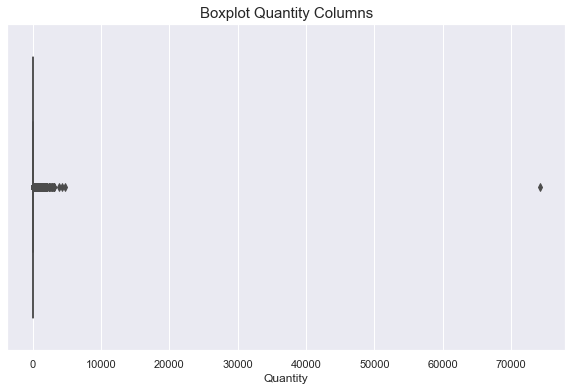

In [150]:
plt.figure(figsize=(10,6))
sns.boxplot(df2['Quantity'])
plt.title('Boxplot Quantity Columns', fontsize=15)
plt.show()

Berdasarkan gambar di atas, terlihat untuk kolom `Quantity` mempunyai data outlier.

**Boxplot in Price Columns**

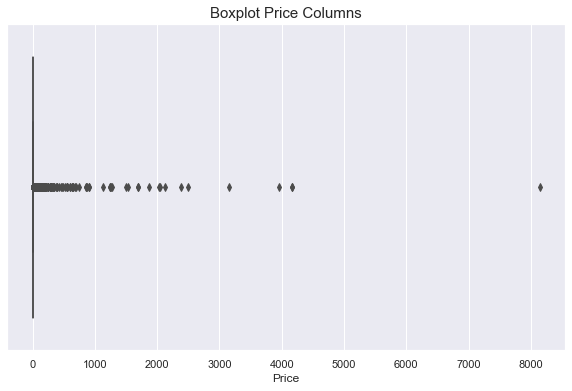

In [151]:
plt.figure(figsize=(10,6))
sns.boxplot(df2['Price'])
plt.title('Boxplot Price Columns', fontsize=15)
plt.show()

Berdasarkan gambar di atas, kolom `Price` mempunyai data outlier.

**Remove Outlier Data From Quantity Columns**

Dalam menangani data *outlier* pada kolom `Quantity`, dapat dihitung terlebih dahulu IQR(*Inter Quartile Range*) dari data. Selanjutnya dapat mencari batas atas *outlier* dan batas bawah *outlier*.

In [152]:
q1_quantity = df2['Quantity'].quantile(0.25)
q3_quantity = df2['Quantity'].quantile(0.75)
IQR = q3_quantity - q1_quantity
min_quantity = q1_quantity - 1.5*IQR
max_quantity = q3_quantity + 1.5*IQR
print(f'Q1:{q1_quantity}')
print(f'Q3:{q3_quantity}')
print(f'IQR:{IQR}')
print(f'Min Quantity:{min_quantity}')
print(f'Max Quantity:{max_quantity}')

Q1:2.0
Q3:12.0
IQR:10.0
Min Quantity:-13.0
Max Quantity:27.0


Selanjutnya lakukan *subsetting* pada data agar mengambil data yang berada di bawah batas atas *outlier* dan di atas batas bawah *outlier*.

In [153]:
df2 = df2[(df2['Quantity']<=max_quantity) & (df2['Quantity']>=min_quantity)]

In [154]:
df2.shape

(351120, 8)

Terlihat jumlah data setelah membuang data *outlier* pada kolom `Quantity` adalah sebanyak 351120.

**Remove Outlier Data From Price Columns**

Lakukan proses yang sama untuk menangani data *outlier* pada kolom `Price`.

In [155]:
q1_price = df2['Price'].quantile(0.25)
q3_price = df2['Price'].quantile(0.75)
IQR = q3_price - q1_price
min_price = q1_price - 1.5*IQR
max_price = q3_price + 1.5*IQR
print(f'Q1:{q1_price}')
print(f'Q3:{q3_price}')
print(f'IQR:{IQR}')
print(f'Min Price:{min_price}')
print(f'Max Price:{max_price}')

Q1:1.25
Q3:3.75
IQR:2.5
Min Price:-2.5
Max Price:7.5


In [156]:
df2 = df2[(df2['Price']<=max_price) & (df2['Price']>=min_price)]

In [157]:
df2.shape

(318446, 8)

Terlihat jumlah data setelah membuang data *outlier* pada kolom `Price` adalah sebanyak 318446.

## Exploratory Data Analysis (EDA)

### Per Month

**Number of Transaction Per Month**

Buat kolom baru `InvoiceMonth` yang menyatakan tahun dan bulan dari tiap transaksi pembelian.

In [158]:
df2['InvoiceMonth'] = df2['InvoiceDate'].dt.strftime('%Y-%m')

Lakukan proses agregasi untuk menghitung jumlah pada kolom `Invoice` berdasarkan bulan transaksi dilakukan.

In [159]:
df2_grp1 = df2.groupby('InvoiceMonth')['Invoice'].count()
df2_grp1

InvoiceMonth
2010-12    21677
2011-01    17454
2011-02    16379
2011-03    22447
2011-04    18822
2011-05    23150
2011-06    22317
2011-07    22395
2011-08    22481
2011-09    33971
2011-10    42148
2011-11    55205
Name: Invoice, dtype: int64

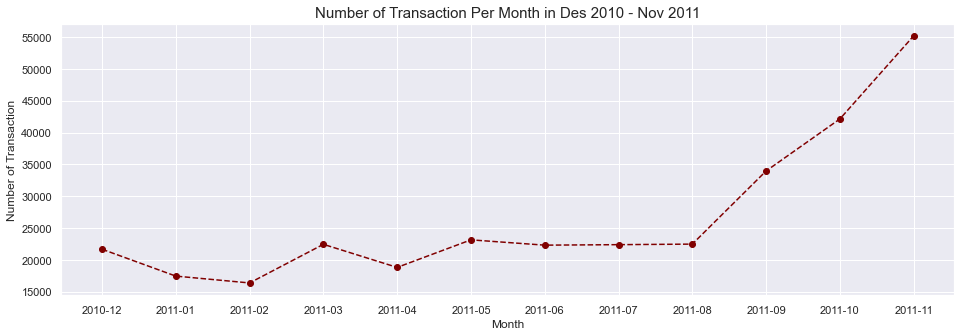

In [160]:
make_line_plot(x=df2_grp1.index, 
               y=df2_grp1, 
               title='Number of Transaction Per Month in Des 2010 - Nov 2011',
               xlabel='Month',
               ylabel='Number of Transaction')

Berdasarkan gambar di atas, terlihat bahwa jumlah transaksi mengalami peningkatan yang tinggi sejak bulan September 2011 hingga mencapai titik tertingginya di bulan November 2011.

**Total Customer Money Spend Per Month**

Buat kolom baru `Spend` yang menyatakan perkalian antara kolom `Quantity` dan `Price`.

In [161]:
df2['Spend'] = df2['Quantity']*df2['Price']

In [162]:
df2.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,Spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


Lakukan proses agregasi untuk menghitung jumlah `Spend` berdasarkan bulan transaksi dilakukan.

In [163]:
df2_grp2 = df2.groupby('InvoiceMonth')['Spend'].sum()
df2_grp2

InvoiceMonth
2010-12    284122.150
2011-01    232767.980
2011-02    219192.880
2011-03    285458.420
2011-04    242420.681
2011-05    324899.440
2011-06    290158.850
2011-07    289068.991
2011-08    305233.840
2011-09    480898.852
2011-10    524843.470
2011-11    642984.880
Name: Spend, dtype: float64

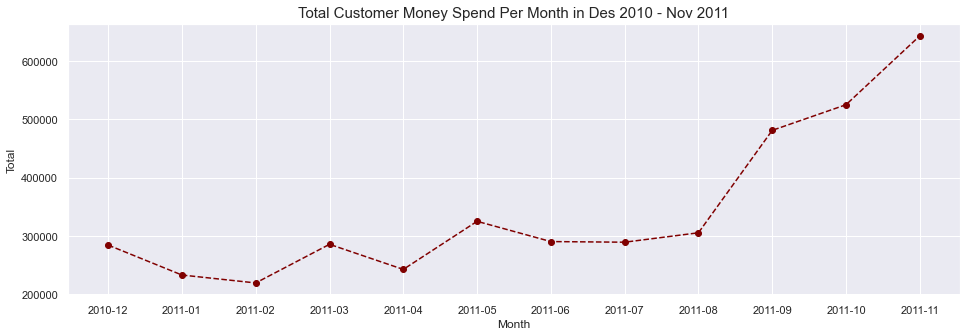

In [164]:
make_line_plot(x=df2_grp2.index, 
               y=df2_grp2, 
               title='Total Customer Money Spend Per Month in Des 2010 - Nov 2011',
               xlabel='Month',
               ylabel='Total')

Berdasarkan gambar di atas, terlihat bahwa jumlah pengeluaran uang *customer* untuk melakukan transaksi juga mengalami peningkatan yang tinggi sejak bulan September 2011 hingga mencapai titik tertingginya di bulan November 2011.

**Average Customer Money Spend Per Month**

Lakukan proses agregasi untuk melihat rataan uang yang dikeluarkan *customer* dalam melakukan transaksi berdasarkan bulan terjadinya transaksi.

In [165]:
df2_grp3 = df1.groupby('InvoiceMonth')['Spend'].mean()
df2_grp3

InvoiceMonth
2009-12    14.015703
2010-01    13.713295
2010-02    13.193756
2010-03    12.980090
2010-04    13.709596
2010-05    13.133443
2010-06    12.392919
2010-07    13.072235
2010-08    13.369689
2010-09    13.980693
2010-10    12.995012
2010-11    12.063481
Name: Spend, dtype: float64

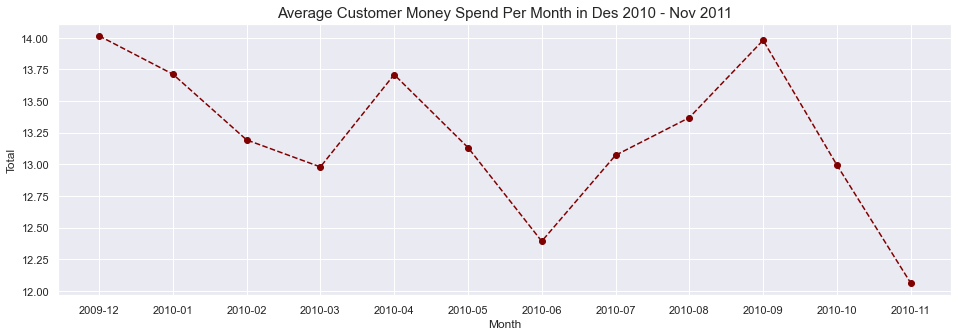

In [166]:
make_line_plot(x=df2_grp3.index, 
               y=df2_grp3, 
               title='Average Customer Money Spend Per Month in Des 2010 - Nov 2011',
               xlabel='Month',
               ylabel='Total')

Berdasarkan gambar di atas, meskipun jumlah transaksi selama satu bulan terbanyak jatuh di bulan November, ternyata rataan uang yang dikeluarkan *customer* dalam melakukan transaksi adalah yang paling rendah dibandingkan bulan lainnya.

### Per Day

Buat kolom baru `InvoiceDay` yang menyatakan hari dari tiap transaksi pembelian.

In [167]:
df2['InvoiceDay'] = df2['InvoiceDate'].dt.strftime('%A')

**Number of Transaction Per Day**

Lakukan proses agregasi untuk melihat jumlah transaksi berdasarkan hari terjadinya transaksi.

In [168]:
df2_grp4 = df2.groupby('InvoiceDay')['Invoice'].count()
df2_grp4

InvoiceDay
Friday       43653
Monday       51689
Sunday       52758
Thursday     62121
Tuesday      53176
Wednesday    55049
Name: Invoice, dtype: int64

In [169]:
df2_grp4 = df2_grp4.reindex(day_index)

In [170]:
df2_grp4

InvoiceDay
Monday       51689.0
Tuesday      53176.0
Wednesday    55049.0
Thursday     62121.0
Friday       43653.0
Saturday         NaN
Sunday       52758.0
Name: Invoice, dtype: float64

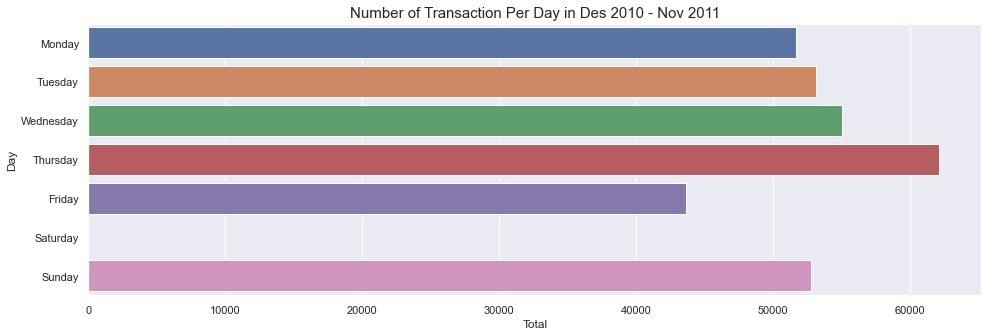

In [171]:
make_bar_plot(y=df2_grp4.index,
              x=df2_grp4,
              title='Number of Transaction Per Day in Des 2010 - Nov 2011',
              ylabel='Day',
              xlabel='Total')

Berdasarkan gambar di atas, terlihat bahwa jumlah transaksi terbanyak jatuh di hari Kamis dan diikuti di hari Rabu. Selain itu, terlihat bahwa tidak ada transaksi yang terjadi pada hari Sabtu.

**Total Customer Money Spend Per Day**

Lakukan proses agregasi untuk menghitung jumlah Spend berdasarkan hari transaksi dilakukan.

In [172]:
df2_grp5 = df2.groupby('InvoiceDay')['Spend'].sum()

In [173]:
df2_grp5 = df2_grp5.reindex(day_index)

In [174]:
df2_grp5

InvoiceDay
Monday       669716.411
Tuesday      721774.641
Wednesday    746059.100
Thursday     878394.130
Friday       614378.561
Saturday            NaN
Sunday       491727.591
Name: Spend, dtype: float64

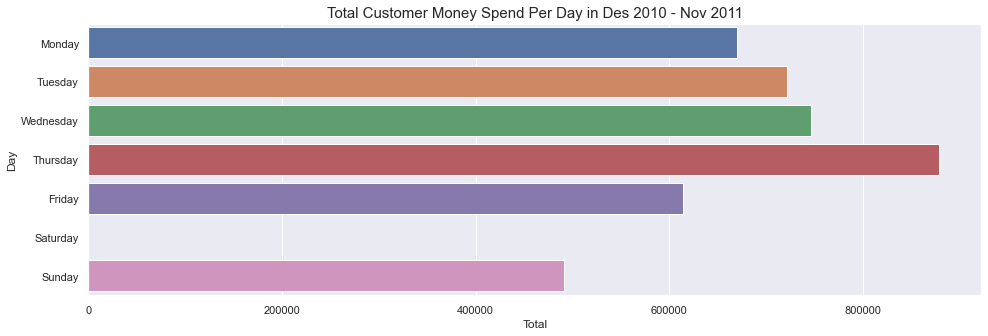

In [175]:
make_bar_plot(y=df2_grp5.index,
              x=df2_grp5,
              title='Total Customer Money Spend Per Day in Des 2010 - Nov 2011',
              ylabel='Day',
              xlabel='Total')

Berdasarkan gambar di atas, terlihat bahwa jumlah pengeluaran uang *customer* terbanyak jatuh di hari Kamis dan diikuti di hari Rabu.

**Average Customer Money Spend Per Day**

Lakukan proses agregasi untuk melihat rataan uang yang dikeluarkan *customer* dalam melakukan transaksi berdasarkan hari terjadinya transaksi.

In [176]:
df2_grp6 = df2.groupby('InvoiceDay')['Spend'].mean()

In [177]:
df2_grp6 = df2_grp6.reindex(day_index)

In [178]:
df2_grp6

InvoiceDay
Monday       12.956652
Tuesday      13.573316
Wednesday    13.552637
Thursday     14.140051
Friday       14.074143
Saturday           NaN
Sunday        9.320437
Name: Spend, dtype: float64

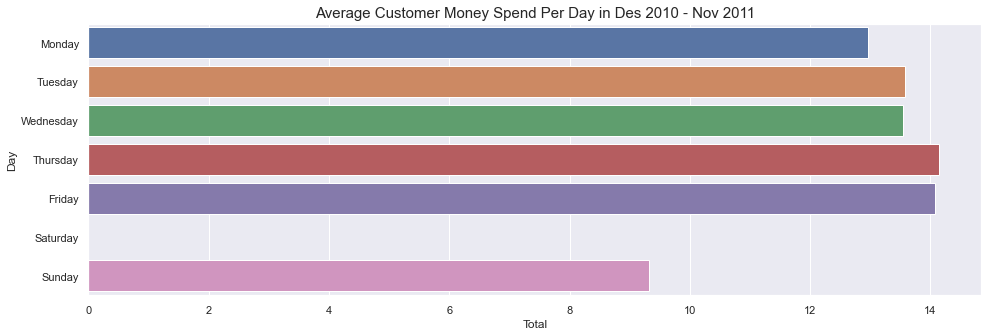

In [179]:
make_bar_plot(y=df2_grp6.index,
              x=df2_grp6,
              title='Average Customer Money Spend Per Day in Des 2010 - Nov 2011',
              ylabel='Day',
              xlabel='Total')

Berdasarkan gambar di atas, terlihat hari dengan rataan uang yang dikeluarkan *customer* tertinggi adalah hari kamis disusul oleh hari jumat.

### Per Hour

Buat kolom baru `InvoiceHour` yang menyatakan jam dari setiap transaksi.

In [180]:
df2['InvoiceHour'] = df2['InvoiceDate'].dt.strftime('%H')

**Number of Transaction Per Hour**

Lakukan agregasi untuk melihat jumlah transaksi yang terjadi berdasarkan jam dilakukan transaksi.

In [181]:
df2_grp7 = df2.groupby('InvoiceHour')['Invoice'].count()
df2_grp7

InvoiceHour
06        1
07      178
08     6562
09    17037
10    29129
11    39378
12    57898
13    52173
14    43973
15    37065
16    19623
17    10091
18     2216
19     2447
20      675
Name: Invoice, dtype: int64

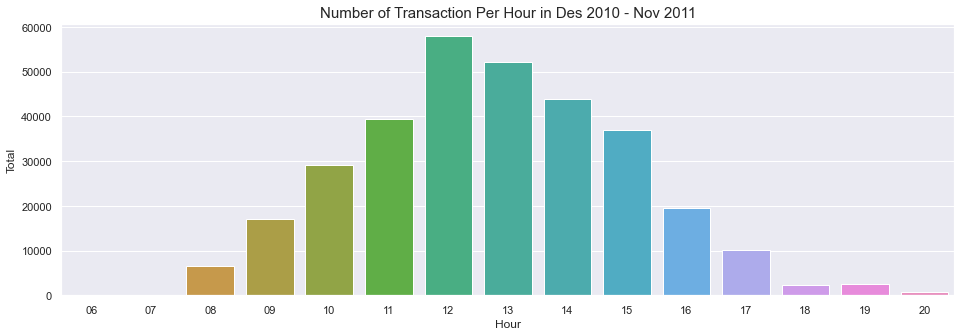

In [182]:
make_bar_plot(x=df2_grp7.index,
              y=df2_grp7,
              title='Number of Transaction Per Hour in Des 2010 - Nov 2011',
              xlabel='Hour',
              ylabel='Total')

Berdasarkan gambar di atas, diperoleh bahwa jam 12, 13, dan 14 adalah tiga jam dengan jumlah terjadi transaksi terbanyak.

**Total Customer Money Spend Per Hour**

Lakukan agregasi untuk melihat jumlah uang yang dikeluarkan *customer* berdasarkan jam dilakukan transaksi.

In [183]:
df2_grp8 = df2.groupby('InvoiceHour')['Spend'].sum()
df2_grp8

InvoiceHour
06         4.250
07      4530.310
08    130799.380
09    329600.111
10    494465.141
11    483609.400
12    686445.090
13    618084.120
14    536258.601
15    454812.650
16    214066.860
17    112979.841
18     29062.850
19     22913.590
20      4418.240
Name: Spend, dtype: float64

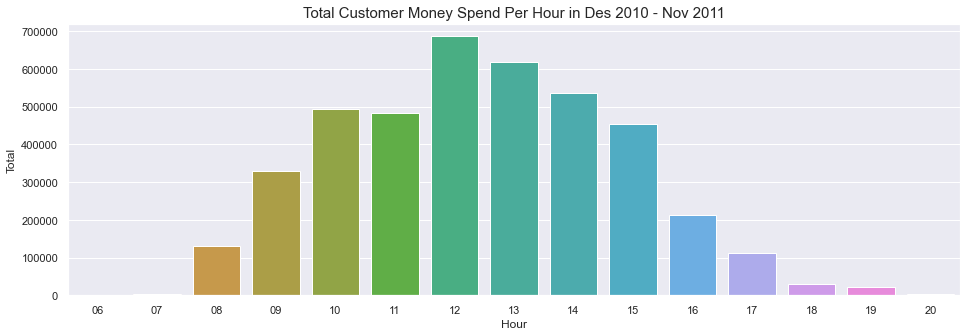

In [184]:
make_bar_plot(x=df2_grp8.index,
              y=df2_grp8,
              title='Total Customer Money Spend Per Hour in Des 2010 - Nov 2011',
              xlabel='Hour',
              ylabel='Total')

Berdasarkan gambar di atas, diperoleh bahwa jam 12, 13, dan 14 adalah tiga jam dengan jumlah uang terbanyak yang dikeluarkan *customer* dalam transaksi.

**Average Customer Money Spend Per Hour**

Dilakukan proses agregasi untuk menghitung rataan Spend yang dikeluarkan customer berdasarkan jam terjadinya transaksi.

In [185]:
df2_grp9 = df2.groupby('InvoiceHour')['Spend'].mean()
df2_grp9

InvoiceHour
06     4.250000
07    25.451180
08    19.932853
09    19.346136
10    16.975013
11    12.281208
12    11.856111
13    11.846820
14    12.195179
15    12.270677
16    10.908977
17    11.196100
18    13.115005
19     9.363952
20     6.545541
Name: Spend, dtype: float64

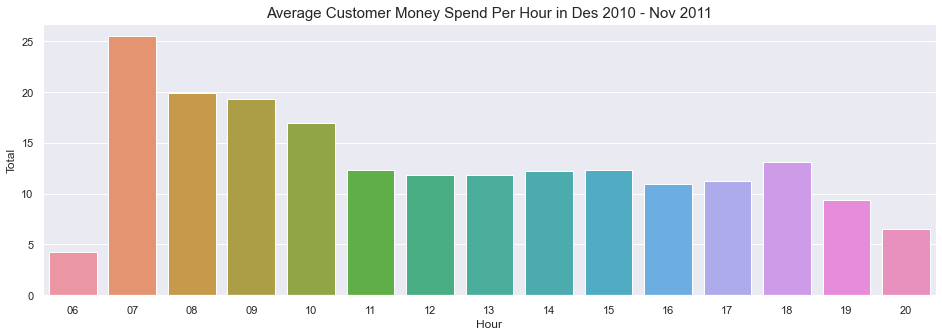

In [186]:
make_bar_plot(x=df2_grp9.index,
              y=df2_grp9,
              title='Average Customer Money Spend Per Hour in Des 2010 - Nov 2011',
              xlabel='Hour',
              ylabel='Total')

Berdasarkan gambar di atas, jam dengan rataan uang customer yang dikeluarkan terbanyak adalah jam 7,8, dan 9. Meskipun merupakan jam dengan jumlah transaksi dan pengeluaran uang customer tertinggi, rataan uang yang dikeluarkan customer untuk transaksi yang terjadi pada jam 12, 13, dan 14 tidak terlalu tinggi.

### Per Product

In [187]:
df2_grp10 = df2['Description'].value_counts().head(10)
df2_grp10

WHITE HANGING HEART T-LIGHT HOLDER    1625
JUMBO BAG RED RETROSPOT               1291
PARTY BUNTING                         1249
LUNCH BAG RED RETROSPOT               1162
ASSORTED COLOUR BIRD ORNAMENT         1116
SET OF 3 CAKE TINS PANTRY DESIGN      1085
LUNCH BAG  BLACK SKULL.                987
SPOTTY BUNTING                         948
LUNCH BAG SPACEBOY DESIGN              931
PACK OF 72 RETROSPOT CAKE CASES        924
Name: Description, dtype: int64

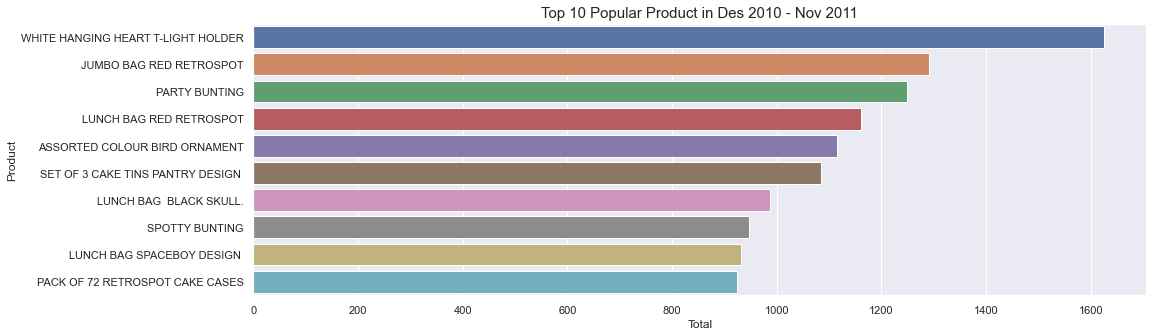

In [188]:
make_bar_plot(y=df2_grp10.index,
              x=df2_grp10,
              title='Top 10 Popular Product in Des 2010 - Nov 2011',
              xlabel='Total',
              ylabel='Product')

Terlihat berdasarkan gambar di atas, produk yang paling sering dibeli oleh customer selama periode bulan Desember 2010 hingga bulan November 2011 adalah *WHITE HANGING HEART T-LIGHT HOLDER* disusul oleh produk *JUMBO BAG RED RETROSPOT* yang menempati posisi kedua.

### Per Country

In [189]:
df2_grp11 = df2['Country'].value_counts().head(10)
df2_grp11

United Kingdom    286683
Germany             7185
France              6610
EIRE                5179
Spain               1976
Belgium             1576
Switzerland         1433
Portugal            1168
Norway               731
Netherlands          606
Name: Country, dtype: int64

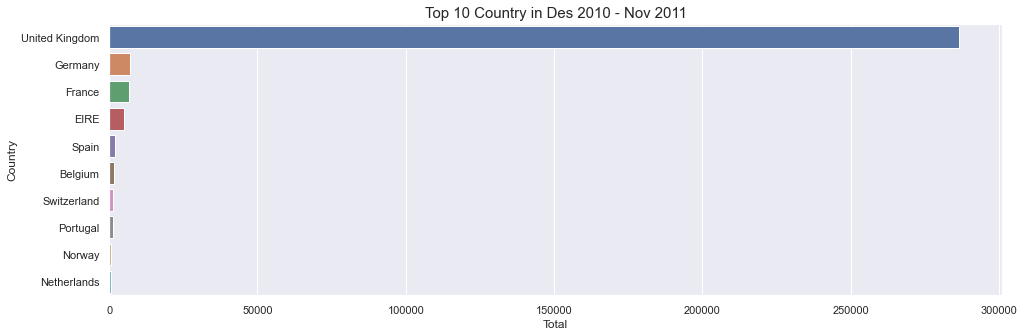

In [190]:
make_bar_plot(y=df2_grp11.index,
              x=df2_grp11,
              title='Top 10 Country in Des 2010 - Nov 2011',
              xlabel='Total',
              ylabel='Country')

Terlihat bahwa transaksi yang dilakukan sangat didominasi oleh *customer* yang berasal dari negara Inggris.

## RFM Analysis

Bangun sebuah dataframe baru yang menyimpan ID dari tiap *customer* secara unik.

In [241]:
df2_customer_unique = pd.DataFrame(df2['Customer ID'].unique()).rename(columns={0:'Customer ID'}).astype(int)
df2_customer_unique.head()

,Customer ID
0,17850
1,13047
2,12583
3,14688
4,17809


### Recency

Catat transaksi terbaru yang dilakukan oleh setiap *customer*.

In [242]:
df2_recent_trans = df2.groupby('Customer ID')['InvoiceDate'].max().reset_index().rename(columns={'InvoiceDate':'Latest Date'})
df2_recent_trans['Customer ID'] = df2_recent_trans['Customer ID'].astype(int)
df2_recent_trans.head()

,Customer ID,Latest Date
0,12347,2011-10-31 12:25:00
1,12348,2011-04-05 10:47:00
2,12349,2011-11-21 09:51:00
3,12350,2011-02-02 16:01:00
4,12352,2011-11-03 14:37:00


Hitung `Recency` yang menyatakan selisih hari antara hari terakhir dimana *customer* melakukan transaksi dengan hari terkini.

In [243]:
df2_recent_trans['Recency'] = (df2_recent_trans['Latest Date'].max() - df2_recent_trans['Latest Date']).dt.days
df2_recent_trans.head()

,Customer ID,Latest Date,Recency
0,12347,2011-10-31 12:25:00,30
1,12348,2011-04-05 10:47:00,239
2,12349,2011-11-21 09:51:00,9
3,12350,2011-02-02 16:01:00,301
4,12352,2011-11-03 14:37:00,27


Lakukan proses *merge* berdasarkan ID unik dari *customer*.

In [244]:
df2_recency = pd.merge(left=df2_customer_unique, 
                       right=df2_recent_trans[['Customer ID', 'Recency']],
                       on='Customer ID')
df2_recency.head()

,Customer ID,Recency
0,17850,363
1,13047,22
2,12583,9
3,14688,30
4,17809,7


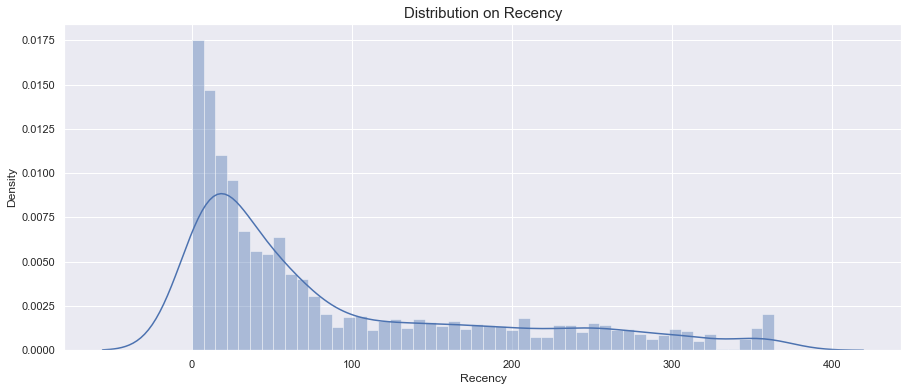

In [245]:
make_displot(df2_recency['Recency'], 'Recency')

Berdasarkan gambar di atas, terlihat grafik distribusi pada `Recency` adalah skew positif.

### Frequency

Catat jumlah transaksi yang telah dilakukan oleh masing-masing *customer*.

In [246]:
df2_freq = df2.groupby('Customer ID')['InvoiceDate'].count().reset_index().rename(columns={'InvoiceDate':'Frequency'})
df2_freq.head()

,Customer ID,Frequency
0,12347.0,155
1,12348.0,6
2,12349.0,58
3,12350.0,16
4,12352.0,66


In [247]:
df2_rf = pd.merge(left=df2_recency,
                  right=df2_freq,
                  on='Customer ID')
df2_rf.head()

,Customer ID,Recency,Frequency
0,17850,363,273
1,13047,22,149
2,12583,9,188
3,14688,30,251
4,17809,7,27


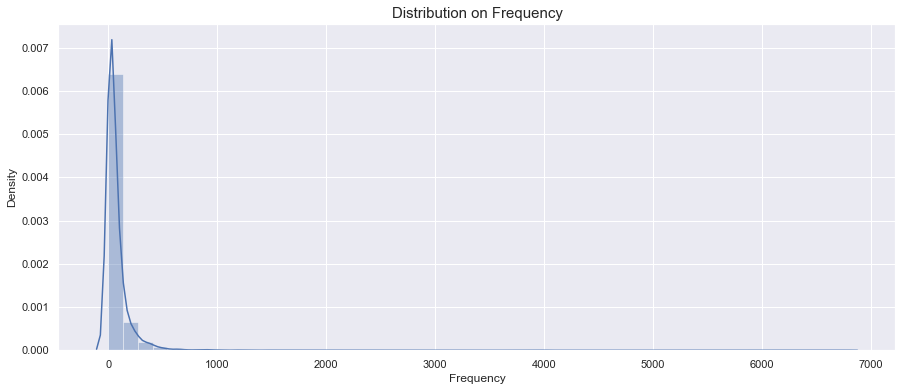

In [248]:
make_displot(df2_rf['Frequency'], 'Frequency')

Berdasarkan gambar, terlihat distribusi pada `Frequency` juga skew positif.

### Monetary

Hitung jumlah uang yang dikeluarkan *customer* selama melakukan transaksi.

In [249]:
df2_monetary = df2.groupby('Customer ID')['Spend'].sum().reset_index().rename(columns={'Spend':'Monetary'})
df2_monetary.head()

,Customer ID,Monetary
0,12347.0,3089.91
1,12348.0,90.20
2,12349.0,999.15
3,12350.0,294.40
4,12352.0,1130.94


In [250]:
df2_rfm = pd.merge(left=df2_rf,
                   right=df2_monetary,
                   on='Customer ID')
df2_rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,17850,363,273,4462.16
1,13047,22,149,2646.26
2,12583,9,188,4765.36
3,14688,30,251,3444.50
4,17809,7,27,729.45


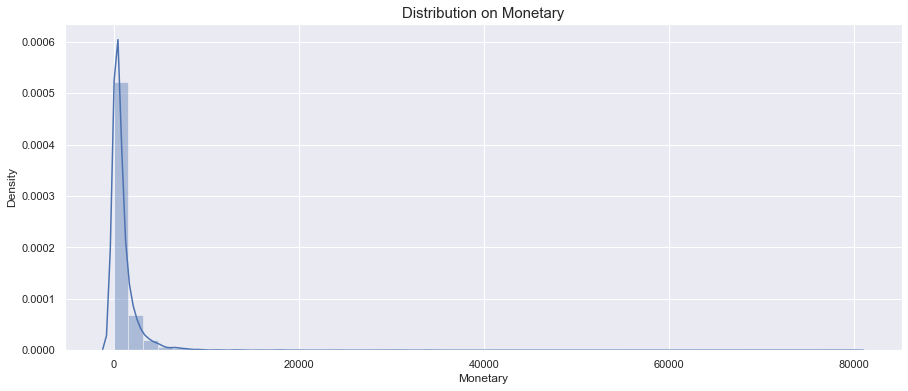

In [251]:
make_displot(df2_rfm['Monetary'], 'Monetary')

Berdasarkan gambar, terlihat distribusi pada `Monetary` juga skew positif.

## Building Model RFM

### Calculate Weight RFM

In [252]:
df2_rfm = df2_rfm.sort_values(by='Customer ID').reset_index(drop=True)

In [253]:
df2_rfm[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,4153.000000,4153.000000,4153.000000
mean,90.583193,76.678546,992.547660
std,98.576784,189.627338,2089.745165
min,0.000000,1.000000,2.900000
25%,16.000000,14.000000,203.860000
50%,48.000000,34.000000,451.250000
75%,145.000000,84.000000,1103.390000
max,364.000000,6771.000000,79836.360000


In [254]:
df2_rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12347,30,155,3089.91
1,12348,239,6,90.20
2,12349,9,58,999.15
3,12350,301,16,294.40
4,12352,27,66,1130.94


**Recency**

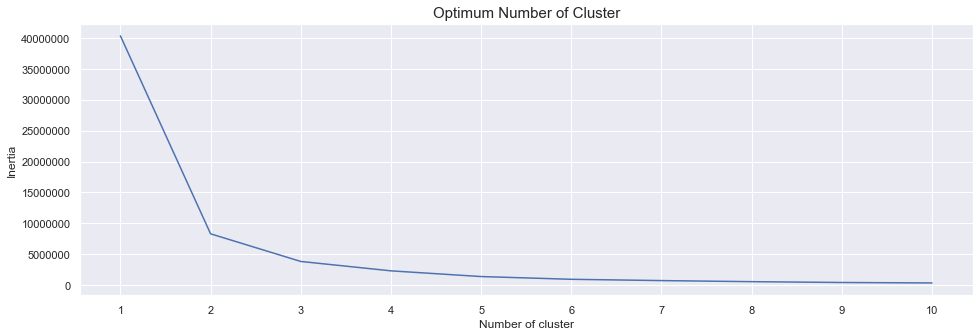

In [255]:
find_cluster(df2_rfm[['Recency']], 11)

Berdasarkan gambar di atas, terlihat bahwa jumlah *cluster* atau `k` ideal adalah 3. Hal ini dikarenakan nilai inersia untuk jumlah *cluster* atau `k` yang lebih besar dari 3 sudah tidak terlalu turun secara drastis. Selanjutnya, dapat digunakan algoritma K-Means Clustering dengan jumlah *cluster* atau `k` = 3 dalam melakukan proses segmentasi.

In [256]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df2_rfm[['Recency']])
df2_rfm['Recency Cluster'] = kmeans.predict(df2_rfm[['Recency']])

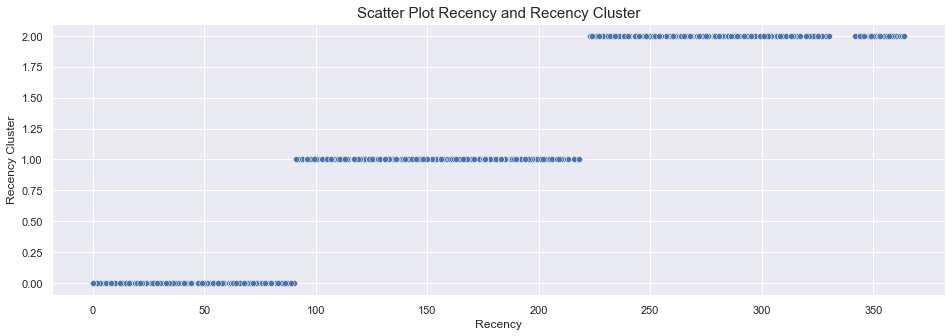

In [257]:
make_scatter(df2_rfm['Recency'], df2_rfm['Recency Cluster'], 'Recency')

Sebelumnya kita telah melakukan proses *clustering* dan jika dilihat pada gambar di atas, telah terbentuk 3 buah *cluster*. Namun urutan dari *cluster* masih belum sesuai. Hal ini dikarenakan kita menyatakan bahwa customer dengan nilai *Recency* yang rendah akan masuk kepada *cluster* terbaik. Oleh kerena itu, akan dilakukan proses dalam mengganti urutan pada *cluster*.

In [258]:
cluster_swap = {0:2, 2:0}
df2_rfm['Recency Cluster'] = df2_rfm['Recency Cluster'].replace(cluster_swap)

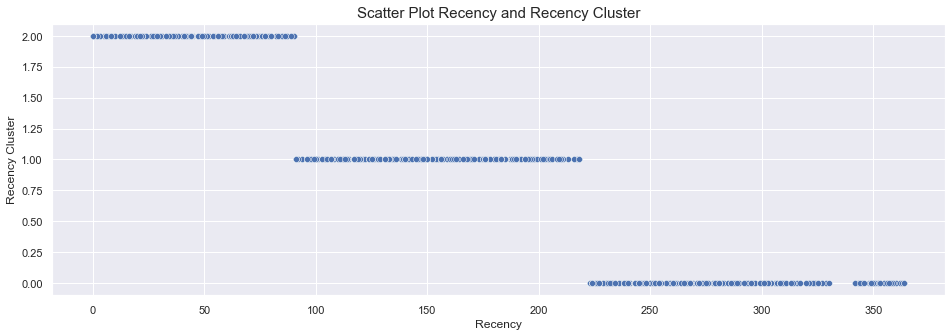

In [259]:
make_scatter(df2_rfm['Recency'], df2_rfm['Recency Cluster'], 'Recency')

Proses perubahan urutan pada *cluster* telah dilakukan.

In [260]:
df2_rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency Cluster
0,12347,30,155,3089.91,2
1,12348,239,6,90.20,0
2,12349,9,58,999.15,2
3,12350,301,16,294.40,0
4,12352,27,66,1130.94,2


**Frequency**

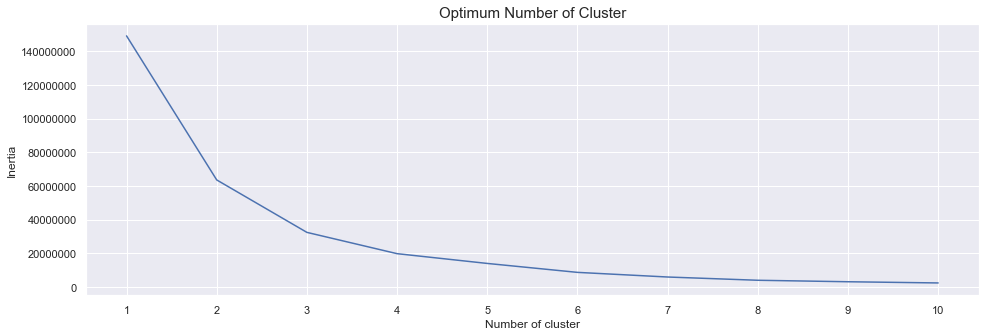

In [261]:
find_cluster(df2_rfm[['Frequency']], 11)

Berdasarkan gambar di atas, kita pilih jumlah cluster atau `k` = 3 dalam melakukan proses *clustering*.

In [262]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df2_rfm[['Frequency']])
df2_rfm['Frequency Cluster'] = kmeans.predict(df2_rfm[['Frequency']])

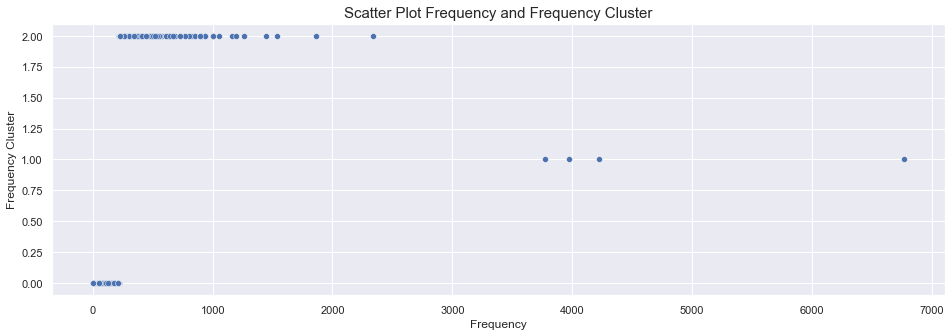

In [263]:
make_scatter(df2_rfm['Frequency'], df2_rfm['Frequency Cluster'], 'Frequency')

Dilakukan proses perubahan urutan pada *cluster*.

In [264]:
cluster_swap = {1:2, 2:1}
df2_rfm['Frequency Cluster'] = df2_rfm['Frequency Cluster'].replace(cluster_swap)

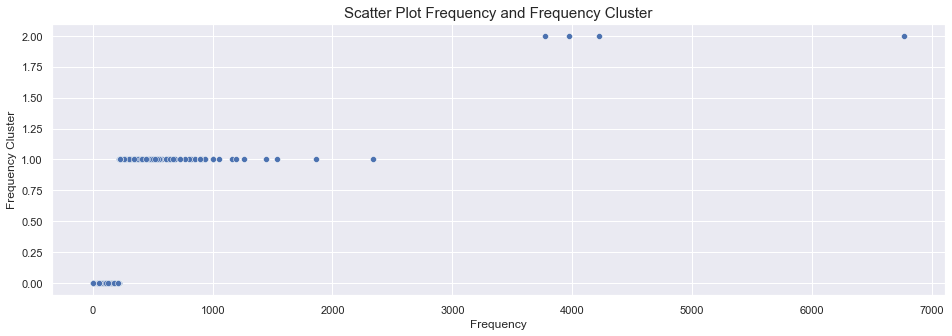

In [265]:
make_scatter(df2_rfm['Frequency'], df2_rfm['Frequency Cluster'], 'Frequency')

In [266]:
df2_rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency Cluster,Frequency Cluster
0,12347,30,155,3089.91,2,0
1,12348,239,6,90.20,0,0
2,12349,9,58,999.15,2,0
3,12350,301,16,294.40,0,0
4,12352,27,66,1130.94,2,0


**Monetary**

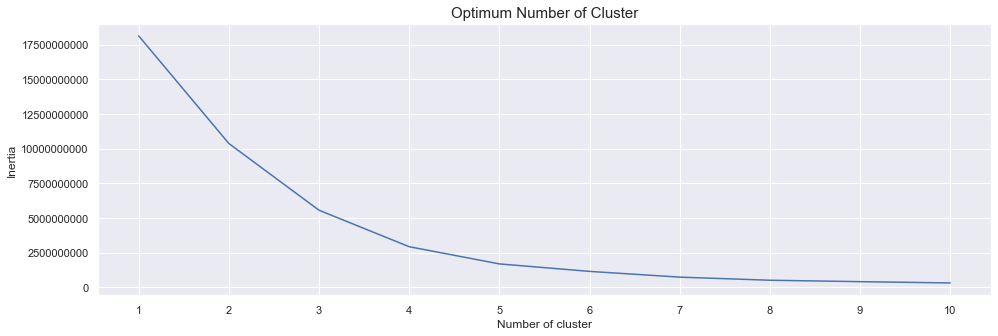

In [267]:
find_cluster(df2_rfm[['Monetary']], 11)

Berdasarkan gambar di atas, kita pilih jumlah *cluster* atau `k` = 3 dalam melakukan proses *clustering*.

In [268]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df2_rfm[['Monetary']])
df2_rfm['Monetary Cluster'] = kmeans.predict(df2_rfm[['Monetary']])

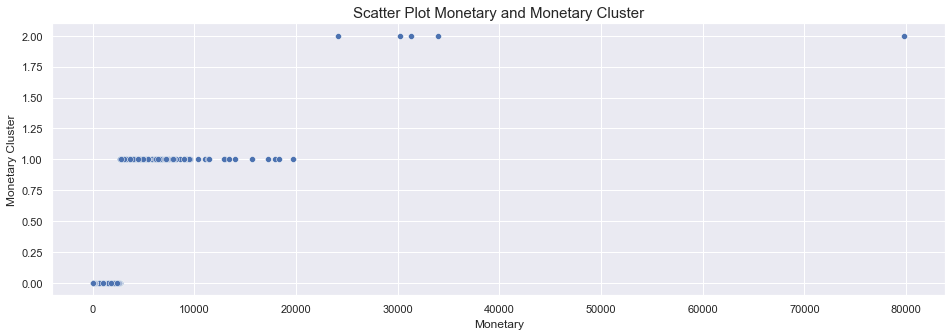

In [269]:
make_scatter(df2_rfm['Monetary'], df2_rfm['Monetary Cluster'], 'Monetary')

Urutan pada *cluster* sudah sesuai.

In [270]:
df2_rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency Cluster,Frequency Cluster,Monetary Cluster
0,12347,30,155,3089.91,2,0,1
1,12348,239,6,90.20,0,0,0
2,12349,9,58,999.15,2,0,0
3,12350,301,16,294.40,0,0,0
4,12352,27,66,1130.94,2,0,0


### Scoring

Jumlahkan nilai *cluster* dari tiap metric dan bentuk kolom `Score`.

In [271]:
df2_rfm['Score'] = df2_rfm['Recency Cluster'] + df2_rfm['Frequency Cluster'] + df2_rfm['Monetary Cluster']

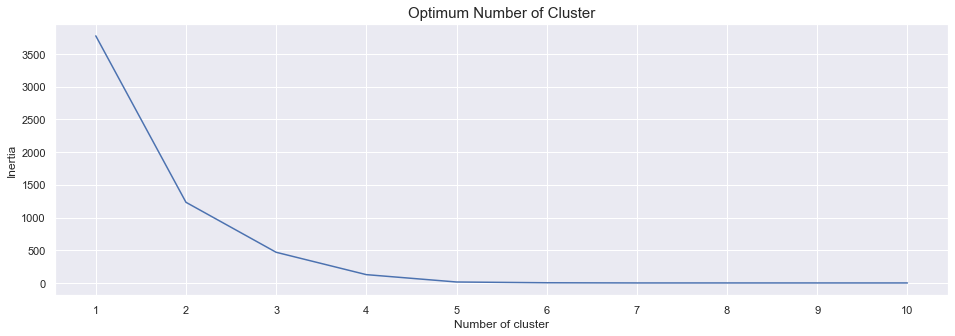

In [272]:
find_cluster(df2_rfm[['Score']], 11)

Pilih jumlah *cluster* atau `k`= 3 dalam melakukan proses *clustering* pada kolom `Score`.

In [273]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df2_rfm[['Score']])
df2_rfm['Score Cluster'] = kmeans.predict(df2_rfm[['Score']])

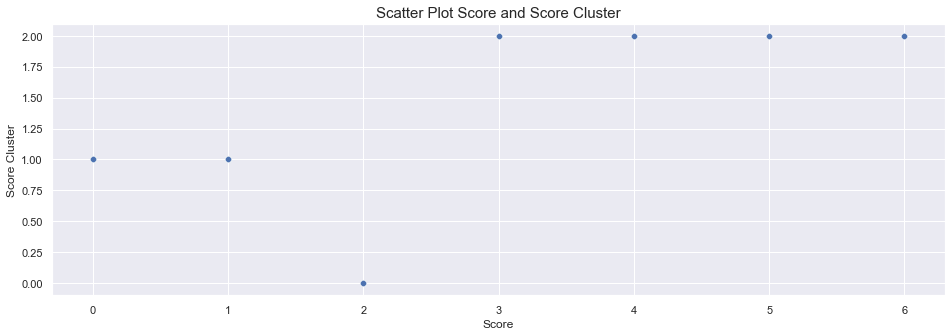

In [274]:
make_scatter(df2_rfm['Score'], df2_rfm['Score Cluster'], 'Score')

Lakukan proses perubahan urutan pada *cluster*.

In [275]:
cluster_swap = {0:1, 1:0}
df2_rfm['Score Cluster'] = df2_rfm['Score Cluster'].replace(cluster_swap)

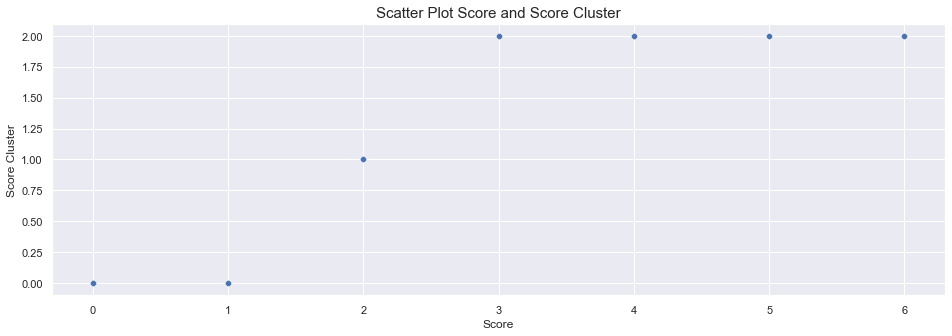

In [276]:
make_scatter(df2_rfm['Score'], df2_rfm['Score Cluster'], 'Score')

In [277]:
df2_rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency Cluster,Frequency Cluster,Monetary Cluster,Score,Score Cluster
0,12347,30,155,3089.91,2,0,1,3,2
1,12348,239,6,90.20,0,0,0,0,0
2,12349,9,58,999.15,2,0,0,2,1
3,12350,301,16,294.40,0,0,0,0,0
4,12352,27,66,1130.94,2,0,0,2,1


Nyatakan *cluster*=0 sebagai *Low Value Customer*, 1 sebagai *Medium Value Customer*, 2 sebagai *High Value Customer*.

In [278]:
cluster_swap = {0:'Low Value Customer', 1:'Medium Value Customer', 2:'High Value Customer'}
df2_rfm['Score Cluster'] = df2_rfm['Score Cluster'].replace(cluster_swap)
df2_rfm = df2_rfm.rename(columns={'Score Cluster':'Label'})

In [279]:
df2_rfm.head()

,Customer ID,Recency,Frequency,Monetary,Recency Cluster,Frequency Cluster,Monetary Cluster,Score,Label
0,12347,30,155,3089.91,2,0,1,3,High Value Customer
1,12348,239,6,90.20,0,0,0,0,Low Value Customer
2,12349,9,58,999.15,2,0,0,2,Medium Value Customer
3,12350,301,16,294.40,0,0,0,0,Low Value Customer
4,12352,27,66,1130.94,2,0,0,2,Medium Value Customer


### Analysis Based on Label

**Number of Customer After Segmentation**

Lakukan proses agregasi untuk melihat jumlah *customer* pada setiap *cluster*.

In [280]:
df2_label = df2_rfm['Label'].value_counts().reindex(['Low Value Customer', 'Medium Value Customer', 'High Value Customer'])
df2_label = df2_label.reset_index().rename(columns={'index':'Label', 'Label':'Count'})
df2_label

,Label,Count
0,Low Value Customer,1387
1,Medium Value Customer,2353
2,High Value Customer,413


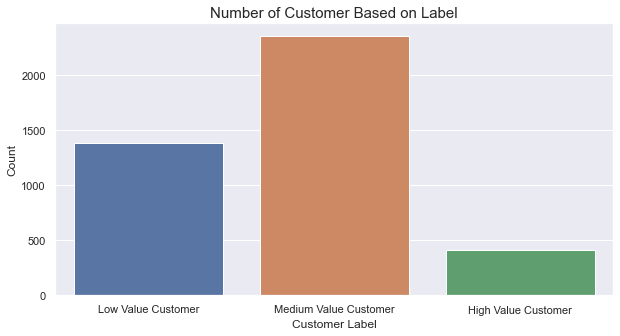

In [281]:
plt.figure(figsize=(10,5))
sns.countplot(df2_rfm['Label'], order=['Low Value Customer', 'Medium Value Customer', 'High Value Customer'])
plt.xlabel('Customer Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Customer Based on Label', fontsize=15)
plt.show()

In [282]:
print('Low Value Customer : {:.3f}%'.format((df2_label['Count'][0]/df2_label['Count'].sum())*100))
print('Medium Value Customer : {:.3f}%'.format((df2_label['Count'][1]/df2_label['Count'].sum())*100))
print('High Value Customer : {:.3f}%'.format((df2_label['Count'][2]/df2_label['Count'].sum())*100))

Low Value Customer : 33.398%
Medium Value Customer : 56.658%
High Value Customer : 9.945%


Berdasarkan gambar di atas, terlihat bahwa customer dengan tipe terbanyak adalah *Medium Value Customer* sebanyak 56.658% diikuti dengan *Low Value Customer* sebanyak 33.398% dan terakhir *High Value Customer* sebanyak 9.945%.

**Group By Label**

In [283]:
df2_rfm.groupby('Label')[['Recency', 'Frequency', 'Monetary']].agg(['sum', 'min', 'max', 'mean']).reindex(['Low Value Customer', 'Medium Value Customer', 'High Value Customer'])

Recency                      Frequency            \
                          sum min  max        mean       sum min   max   
Label                                                                    
Low Value Customer     292241  91  364  210.700072     38161   1   202   
Medium Value Customer   77293   0  363   32.848704    130503   1   490   
High Value Customer      6658   0   87   16.121065    149782  64  6771   

                                      Monetary                                 
                             mean          sum     min       max         mean  
Label                                                                          
Low Value Customer      27.513338   489785.491    2.90   3429.47   353.125805  
Medium Value Customer   55.462388  1766891.973    5.93   4462.16   750.910316  
High Value Customer    362.668281  1865372.970  838.78  79836.36  4516.641574

Jika melihat berdasarkan tabel di atas, *customer* bertipe *Low Value Customer* rata-rata menghabiskan 210 hari untuk melakukan transaksi selanjutnya, dengan rataan jumlah transaksi sebanyak 27 kali dan rataan total pengeluaran uang sebanyak 353,12. Sementara untuk *customer* bertipe *Medium Value Customer* rata-rata membutuhkan 32 hari untuk melakukan transaksi selanjutnya, dengan rataan jumlah transaksi sebanyak 55 kali dan rataan total pengeluaran uang sebanyak 750,91. Untuk *customer* dengan tipe *High Value Customer* rata-rata menghabiskan 16 hari untuk melakukan traksaksi selanjutnya, dengan rataan jumlah transaksi sebanyak 362 kali dan rataan total pengeluaran uang sebanyak 4516,64.

### Customer Behaviour

**Create New Data Frame**

In [284]:
df2_rfm_new = df2_rfm[['Customer ID', 'Label', 'Recency', 'Frequency', 'Monetary']].copy()
df2_rfm_new.head()

,Customer ID,Label,Recency,Frequency,Monetary
0,12347,High Value Customer,30,155,3089.91
1,12348,Low Value Customer,239,6,90.20
2,12349,Medium Value Customer,9,58,999.15
3,12350,Low Value Customer,301,16,294.40
4,12352,Medium Value Customer,27,66,1130.94


**Scalling**

Lakukan proses *scalling* untuk mentransformasikan data agar tidak terjadi skew pada data menggunakan fungsi logaritmik. Selanjutnya lakukan proses standarisasi pada data menggunakan `StandardScaler()`.

In [285]:
scaler = StandardScaler()
df2_rfm_scaled = df1_rfm_new.copy()
df2_rfm_scaled[['Recency', 'Frequency', 'Monetary']] = np.log(df2_rfm_scaled[['Recency', 'Frequency', 'Monetary']]+1)
df2_rfm_scaled[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(df2_rfm_scaled[['Recency', 'Frequency', 'Monetary']])

**Check Distribution**

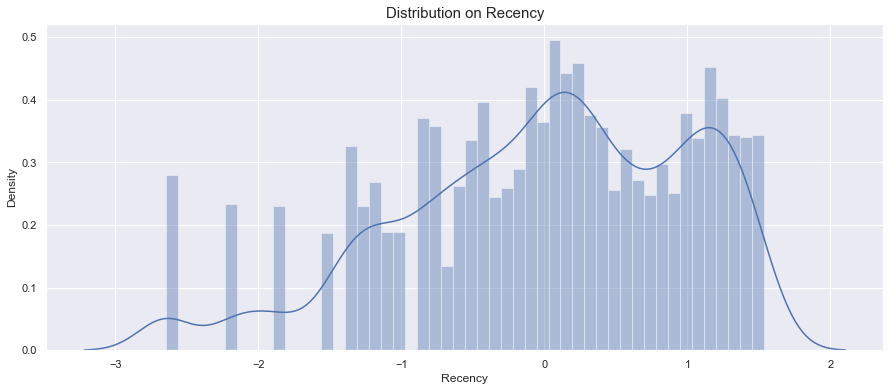

In [286]:
make_displot(df2_rfm_scaled['Recency'], 'Recency')

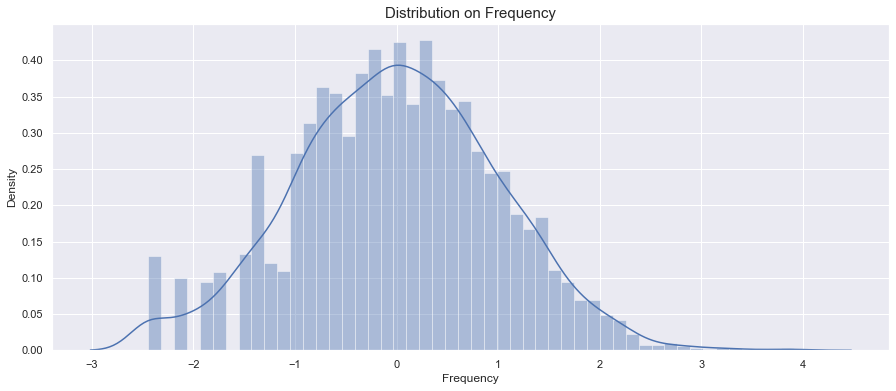

In [287]:
make_displot(df2_rfm_scaled['Frequency'], 'Frequency')

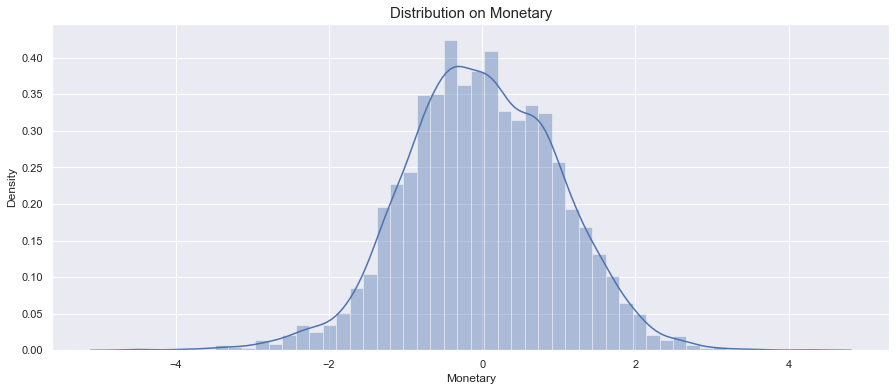

In [288]:
make_displot(df2_rfm_scaled['Monetary'], 'Monetary')

Berdasarkan tiga gambar di atas, terlihat bahwa distribusi pada kolom `Recency`, `Frequency`, dan `Monetary` sudah berbentuk distribusi normal.

**Melt**

In [289]:
df2_rfm_melt = df2_rfm_scaled.melt(id_vars=['Customer ID', 'Label'], var_name='Metric', value_name='Value')
df2_rfm_melt.head()

,Customer ID,Label,Metric,Value
0,12346,Low Value Customer,Recency,0.931735
1,12347,Medium Value Customer,Recency,-0.213820
2,12348,Medium Value Customer,Recency,0.311080
3,12349,Medium Value Customer,Recency,-0.148333
4,12351,Medium Value Customer,Recency,-2.156914


**Plot Customer Behaviour**

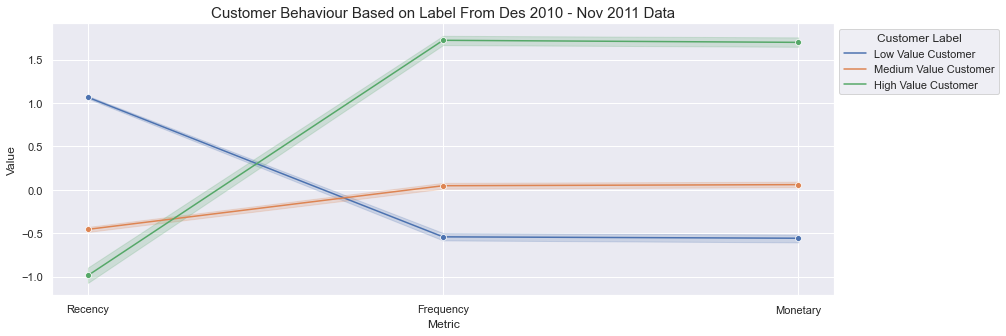

In [290]:
plt.figure(figsize=(14,5))
sns.lineplot(x='Metric', y='Value', hue='Label', data=df2_rfm_melt, marker='o')
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Customer Behaviour Based on Label From Des 2010 - Nov 2011 Data', fontsize=15)
plt.legend(bbox_to_anchor=(1,1), loc='best', title='Customer Label')
plt.show()

Berdasarkan gambar di atas, diperoleh beberapa *insight* antara lain :

1. *Customer* dengan kriteria `Low Value Customer` menghabiskan uang (*Monetary*) relatif lebih sedikit dibandingkan dengan *customer* dengan kriteria lainnya. *Customer* dengan kriteria ini juga tidak terlalu sering berbelanja (*Frequency*) jika dibandingkan dengan *customer* kriteria lainnya. Namun *customer* dengan kriteria ini memiliki (*Recency*) yang tinggi. 
2. *Customer* dengan kriteria `Medium Value Customer` menghabiskan uang (*Monetary*) dan melakukan banyak pembelian (*Frequency*) yang relatif lebih tinggi dibandingkan dengan `Low Value Customer` dan memiliki nilai *Recency* yang lebih baik dan lebih rutin melakukan pembelian barang dibandingkan dengan `Low Value Customer`.
3. *Customer* dengan kriteria `High Value Customer` menghabiskan uang (*Monetary*) dan melakukan banyak pembelian (*Frequency*) yang sangat tinggi jika dibandingkan kriteria lainnya. Selain itu, *customer* dengan tipe ini juga melakukan transaksi secara rutin jika dilihat berdasarkan nilai (*Recency*). 

## Conclusion

Berdasarkan proses yang telah dilakukan, dapat diperoleh beberapa kesimpulan yang dapat menajwab permasalahan sebelumnya. Kesimpulan ini diharapkan dapat menjawab permasalahan yang telah didefinisikan sebelumnya.

**1. Mendapatkan gambaran bisnis produk yang terjual pada tahun 2009-2010 dan 2010-2011.<br>**
Jawab : <br>

Berdasarkan data pada bulan Desember 2009 hingga November 2010, diperoleh beberapa gambaran bisnis terkait produk. </br>
   - Jumlah transaksi dan jumlah uang yang dikeluarkan *customer* mengalami peningkatan sejak bulan September 2009 dan mencapai puncak tertinggi pada bulan November 2010.
   - Jumlah transaksi terbanyak terjadi pada hari Kamis disusul oleh hari Minggu.
   - Jumlah uang yang dikeluarkan *customer* terbanyak terjadi pada hari Kamis disusul oleh hari Selasa.
   - Jumlah transaksi dan jumlah uang yang dikeluarkan *customer* terbanyak terjadi pada jam 12, 13, dan 14.
   - Produk dengan penjualan tertinggi adalah *WHITE HANGING HEART T-LIGHT HOLDER* dengan jumlah penjualan sebanyak 2 kali lipat dibandingkan produk *STRAWBERRY CERAMIC TRINKET BOX* yang menempati posisi kedua.
   - Negara dengan jumlah transaksi tertinggi adalah Inggris dan sangat mendominasi dibandingkan negara lainnya.

Berdasarkan data pada bulan Desember 2010 hingga November 2011, diperoleh beberapa gambaran bisnis terkait produk. </br>
   - Jumlah transaksi dan jumlah uang yang dikeluarkan *customer* mengalami peningkatan sejak bulan September 2010 dan mencapai puncak tertinggi pada bulan November 2011.
   - Jumlah transaksi terbanyak terjadi pada hari Kamis disusul oleh hari Rabu.
   - Jumlah uang yang dikeluarkan *customer* terbanyak terjadi pada hari Kamis disusul oleh hari Rabu.
   - Jumlah transaksi dan jumlah uang yang dikeluarkan *customer* terbanyak terjadi pada jam 12, 13, dan 14.
   - Produk dengan penjualan tertinggi adalah *WHITE HANGING HEART T-LIGHT HOLDER* disusul oleh produk *JUMBO BAG RED RETROSPOT* yang menempati posisi kedua.
   - Negara dengan jumlah transaksi tertinggi adalah Inggris dan sangat mendominasi dibandingkan negara lainnya.

**2. Melakukan segmentasi pada Customer untuk melihat karakteristiknya.<br>**
Jawab : <br>

Berdasarkan data pada bulan Desember 2009 hingga November 2010, diperoleh gambaran mengenai *customer*. </br>
   - Kriteria *customer* dapat dibagi ke dalam tiga buah segmen yaitu *Low Value Customer* sebanyak 1350 orang atau 32.959%, *Medium Value Customer* sebanyak 2388 orang atau 58.301%, dan *High Value Customer* sebanyak 358 orang atau 8.740%.
   - *Customer* bertipe *Low Value Customer* rata-rata menghabiskan 203 hari untuk melakukan transaksi selanjutnya, dengan rataan jumlah transaksi sebanyak 30 kali dan rataan total pengeluaran uang sebanyak 409,7. Sementara untuk *customer* bertipe *Medium Value Customer* rata-rata membutuhkan 32 hari untuk melakukan transaksi selanjutnya, dengan rataan jumlah transaksi sebanyak 60 kali dan rataan total pengeluaran uang sebanyak 808,57. Untuk *customer* dengan tipe *High Value Customer* rata-rata menghabiskan 17 hari untuk melakukan traksaksi selanjutnya, dengan rataan jumlah transaksi sebanyak 398 kali dan rataan total pengeluaran uang sebanyak 5153,81.

Berdasarkan data pada bulan Desember 2010 hingga November 2011, diperoleh gambaran mengenai *customer*. </br>
   - Kriteria *customer* dapat dibagi ke dalam tiga buah segmen yaitu *Low Value Customer* sebanyak 1387 orang atau 33.398%, *Medium Value Customer* sebanyak 2353 orang atau 56.658%, dan *High Value Customer* sebanyak 413 orang atau 9.945%.
   - *Customer* bertipe *Low Value Customer* rata-rata menghabiskan 210 hari untuk melakukan transaksi selanjutnya, dengan rataan jumlah transaksi sebanyak 27 kali dan rataan total pengeluaran uang sebanyak 353,12. Sementara untuk *customer* bertipe *Medium Value Customer* rata-rata membutuhkan 32 hari untuk melakukan transaksi selanjutnya, dengan rataan jumlah transaksi sebanyak 55 kali dan rataan total pengeluaran uang sebanyak 750,91. Untuk *customer* dengan tipe *High Value Customer* rata-rata menghabiskan 16 hari untuk melakukan traksaksi selanjutnya, dengan rataan jumlah transaksi sebanyak 362 kali dan rataan total pengeluaran uang sebanyak 4516,64.

Berdasarkan data baik pada periode bulan Desember 2009 hingga November 2010 dan periode bulan Desember 2010 hingga November 2011, diperoleh ciri khas dari tiap kriteria *customer* berdasarkan nilai *Recency*, *Frequency*, dan *Monetary*. </br>
   - *Customer* dengan kriteria *Low Value Customer* menghabiskan uang (*Monetary*) relatif lebih sedikit dibandingkan dengan *customer* dengan kriteria lainnya. *Customer* dengan kriteria ini juga tidak terlalu sering berbelanja (*Frequency*) jika dibandingkan dengan *customer* kriteria lainnya. Namun *customer* dengan kriteria ini memiliki (*Recency*) yang tinggi.
   - *Customer* dengan kriteria *Medium Value Customer* menghabiskan uang (*Monetary*) dan melakukan banyak pembelian (*Frequency*) yang relatif lebih tinggi dibandingkan dengan *Low Value Customer* dan memiliki nilai *Recency* yang lebih baik dan lebih rutin melakukan pembelian barang dibandingkan dengan *Low Value Customer*.
   - *Customer* dengan kriteria *High Value Customer* menghabiskan uang (*Monetary*) dan melakukan banyak pembelian (*Frequency*) yang sangat tinggi jika dibandingkan kriteria lainnya. Selain itu, *customer* dengan tipe ini juga melakukan transaksi secara rutin jika dilihat berdasarkan nilai (*Recency*).

**3. Mengetahui rekomendasi yang dapat dilakukan setelah diketahui karakteristik Customer.<br>**
Jawab : <br>

   - Untuk *Customer* dengan kriteria *Low Value Customer*, dapat dibuat strategi untuk memberikan diskon dan memberikan rekomendasi produk yang sedang trend pada saat ini. Hal ini dikarenakan customer dengan kriteria ini memiliki nilai *recency* yang tinggi yang membuat customer dengan kriteria ini akan berbelanja apabila diberikan harga yang lebih murah.
   - Untuk *Customer* dengan kriteria *Medium Value Customer*, dapat dibuat strategi untuk memberikan promo tertentu pada waktu tertentu untuk meningkatkan nilai *recency* pada *customer* dengan kriteria ini.
   - Untuk *Customer* dengan kriteria *High Value Customer*, dapat dibuat strategi untuk memberikan *reward* berupa kupon yang dapat digunakan dalam memberi barang. Hal lain yang dapat dilakukan adalah membuat promo tertentu pada waktu tertentu untuk meningkatkan nilai recency pada customer dengan kriteria ini.